In [1]:
from core.models.MLP import * 
from core.DataLoader import *
from core.Visualizer import *
engine = 'postgres'

In [2]:
def visualize_problematic_space_on_dataset_2d(estimate_res, groundtruth_res, title, x_label, y_label, reset_fig=True):
    plot_2d_problematic_decision_with_importance(estimate_res, groundtruth_res, filename=None, title=title,x_label=x_label, y_label=y_label, reset_fig=reset_fig)

def visualize_pair_on_dataset_2d(res, title, x_label, y_label):
    plot_2d_optimal_decision_with_importance(res, filename=None, title=title,x_label=x_label, y_label=y_label)

datasets=['tpch']
dl = DataLoader(engine, base_dir='/mnt/interpretable-cost-model/sample_results/')

# estimated_one_file_dss, estimated_one_file_names = dl.get_one_file_ds(return_type='ds and names', datasets=datasets)

gt_one_file_dss, estimated_one_file_dss, gt_one_file_names, estimated_one_file_names = dl.get_groundtruth_file_ds(return_type='ds and names', datasets=datasets)

features = ['sel_of_pred_on_indexed_attr', 'left_cardinality']
features_2d_plot = ['sel_of_pred_on_indexed_attr', 'left_cardinality',  'hj_idx_cost', 'hj_seq_cost', 'nl_idx_cost', 'nl_seq_cost', 'mj_idx_cost', 'mj_seq_cost']

In [3]:
def cdf(costs, error_costs, x_label='estimated costs', y_label='CDF', title=''):
    x, y = sorted(costs), np.arange(len(costs)) / len(costs)
    if error_costs is not None:
        err_x, err_y = sorted(error_costs), np.arange(len(error_costs)) / len(error_costs)
        err_y *=  (len(error_costs) / len(costs))
    
    plt.plot(x, y, label="all queries", color='b')
    if error_costs is not None:
        plt.plot(err_x, err_y, label="queries with wrong prediction", color='r')
    plt.legend()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    return 

# CDF of estimated cost

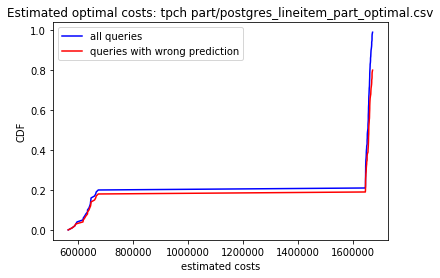

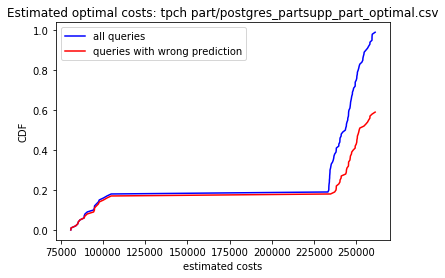

In [4]:
present_idxs = range(len(gt_one_file_dss))
N = 100
models = []
scalers = []

for f_cnt in present_idxs:
    

    est_ds = estimated_one_file_dss[f_cnt].head(N)
    
    # ====================================================================
    X = est_ds[features]
    y = est_ds['optimal_decision'].to_numpy()
    X_costs = est_ds[dl.regression_targets].to_numpy()
    
    X_optimal_cost = np.zeros(len(y))
    for i in range(len(y)):
        X_optimal_cost[i] = X_costs[i, y[i]]
    # ====================================================================
    
    gt_ds = gt_one_file_dss[f_cnt].head(N)
    
    # ====================================================================
    gt_y = gt_ds['optimal_decision'].to_numpy()    
    X_err_cost = []
    for i in range(len(y)):
        if y[i] != gt_y[i]:
            X_err_cost.append(X_optimal_cost[i])
    X_err_cost = np.array(X_err_cost)
    # ====================================================================
    cdf(X_optimal_cost, X_err_cost, title=f'Estimated optimal costs: {estimated_one_file_names[f_cnt]}')
    plt.show()
#     break

# CDF of groundtruth optimal cost

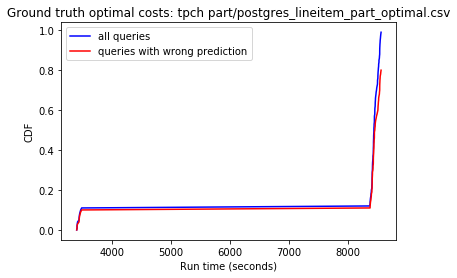

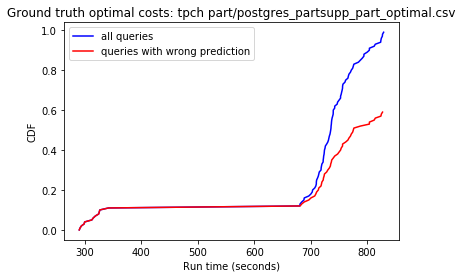

In [5]:
present_idxs = range(len(gt_one_file_dss))
N = 100
models = []
scalers = []

for f_cnt in present_idxs:
    

    gt_ds = gt_one_file_dss[f_cnt].head(N)
    
    # ====================================================================
    X = gt_ds[features]
    y = gt_ds['optimal_decision'].to_numpy()
    X_costs = gt_ds[dl.regression_targets].to_numpy()
    
    X_optimal_cost = np.zeros(len(y))
    for i in range(len(y)):
        X_optimal_cost[i] = X_costs[i, y[i]]
    # ====================================================================
    
    est_ds = estimated_one_file_dss[f_cnt].head(N)
    
    # ====================================================================
    est_y = est_ds['optimal_decision'].to_numpy()    
    X_err_cost = []
    for i in range(len(y)):
        if y[i] != est_y[i]:
            X_err_cost.append(X_optimal_cost[i])
    X_err_cost = np.array(X_err_cost)
    # ====================================================================
    cdf(X_optimal_cost, X_err_cost, x_label='Run time (seconds)', title=f'Ground truth optimal costs: {estimated_one_file_names[f_cnt]}')
    plt.show()
#     break

# CDF of run time diff

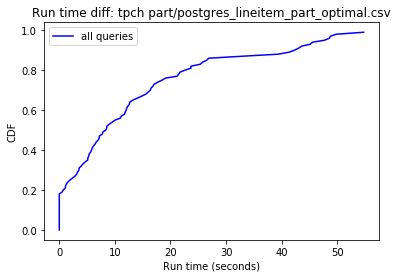

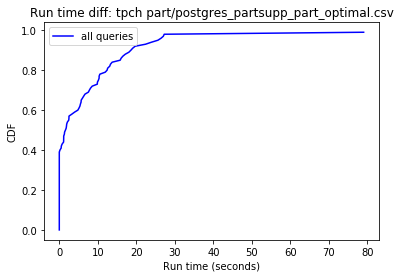

In [6]:
present_idxs = range(len(gt_one_file_dss))
N = 100
models = []
scalers = []

for f_cnt in present_idxs:
    

    gt_ds = gt_one_file_dss[f_cnt].head(N)
    
    # ====================================================================
    X = gt_ds[features]
    y = gt_ds['optimal_decision'].to_numpy()
    X_costs = gt_ds[dl.regression_targets].to_numpy()
    # ====================================================================
    
    est_ds = estimated_one_file_dss[f_cnt].head(N)
    
    # ====================================================================
    est_y = est_ds['optimal_decision'].to_numpy()    
    
    X_cost_diff = []
    
    for i in range(len(y)):
        X_cost_diff.append(X_costs[i, est_y[i]] - X_costs[i, y[i]])
    
    X_err_cost = np.array(X_err_cost)
    
    # ====================================================================
    cdf(X_cost_diff, None, x_label='Run time (seconds)', title=f'Run time diff: {estimated_one_file_names[f_cnt]}')
    plt.show()
#     break

# Estimated optimal choices: error rate per choice

In [7]:
present_idxs = range(len(gt_one_file_dss))
N = 100



for f_cnt in present_idxs:
    
    error_cnts = [0 for i in range(6)]

    class_cnts = [0 for i in range(6)]
    
    est_ds = estimated_one_file_dss[f_cnt].head(N)
    
    # ====================================================================
    X = est_ds[features]
    y = est_ds['optimal_decision'].to_numpy()
    X_costs = est_ds[dl.regression_targets].to_numpy()
    # ====================================================================
    
    gt_ds = gt_one_file_dss[f_cnt].head(N)
    # ====================================================================
    gt_y = gt_ds['optimal_decision'].to_numpy()    
    # ====================================================================
    

    
    for i in range(len(y)):
        class_cnts[y[i]] += 1
        if y[i] != gt_y[i]:
            error_cnts[y[i]] += 1
    
    print(f"{estimated_one_file_names[f_cnt]}")
    for i in range(6):
        if class_cnts[i] == 0:
            print(f"Error rate for estimated class {i}: -")
        else:  
            print(f"Error rate for ground truth class {i}:  {error_cnts[i] /class_cnts[i] } ({ error_cnts[i] } / {class_cnts[i] })")
    print("")


tpch part/postgres_lineitem_part_optimal.csv
Error rate for ground truth class 0:  0.7945205479452054 (58 / 73)
Error rate for ground truth class 1:  0.7272727272727273 (8 / 11)
Error rate for estimated class 2: -
Error rate for estimated class 3: -
Error rate for ground truth class 4:  0.9375 (15 / 16)
Error rate for estimated class 5: -

tpch part/postgres_partsupp_part_optimal.csv
Error rate for ground truth class 0:  0.56 (42 / 75)
Error rate for ground truth class 1:  0.4166666666666667 (5 / 12)
Error rate for estimated class 2: -
Error rate for estimated class 3: -
Error rate for ground truth class 4:  1.0 (13 / 13)
Error rate for estimated class 5: -



# Ground truth optimal: error rate per groundtruth optimal

In [8]:
present_idxs = range(len(gt_one_file_dss))
N = 100

for f_cnt in present_idxs:
    error_cnts = [0 for i in range(6)]

    class_cnts = [0 for i in range(6)]
    gt_ds = gt_one_file_dss[f_cnt].head(N)
    
    # ====================================================================
    X = gt_ds[features]
    y = gt_ds['optimal_decision'].to_numpy()
    X_costs = gt_ds[dl.regression_targets].to_numpy()
    # ====================================================================
    
    est_ds = estimated_one_file_dss[f_cnt].head(N)
    # ====================================================================
    est_y = est_ds['optimal_decision'].to_numpy()    
    # ====================================================================
    
    for i in range(len(y)):
        class_cnts[y[i]] += 1
        if y[i] != est_y[i]:
            error_cnts[y[i]] += 1
    
    print(f"{estimated_one_file_names[f_cnt]}")
    for i in range(6):
        if class_cnts[i] == 0:
            print(f"Error rate for ground truth class {i}: -")
        else:  
            print(f"Error rate for ground truth class {i}: {error_cnts[i] /class_cnts[i] } ({ error_cnts[i] } / {class_cnts[i] })")
    print("")

tpch part/postgres_lineitem_part_optimal.csv
Error rate for ground truth class 0: 0.25 (5 / 20)
Error rate for ground truth class 1: 0.8421052631578947 (16 / 19)
Error rate for ground truth class 2: 1.0 (57 / 57)
Error rate for ground truth class 3: -
Error rate for ground truth class 4: 0.5 (1 / 2)
Error rate for ground truth class 5: 1.0 (2 / 2)

tpch part/postgres_partsupp_part_optimal.csv
Error rate for ground truth class 0: 0.0 (0 / 33)
Error rate for ground truth class 1: 0.6111111111111112 (11 / 18)
Error rate for ground truth class 2: 1.0 (40 / 40)
Error rate for ground truth class 3: -
Error rate for ground truth class 4: 1.0 (9 / 9)
Error rate for ground truth class 5: -



# Ground truth of mispredicted queries

<Figure size 432x288 with 0 Axes>

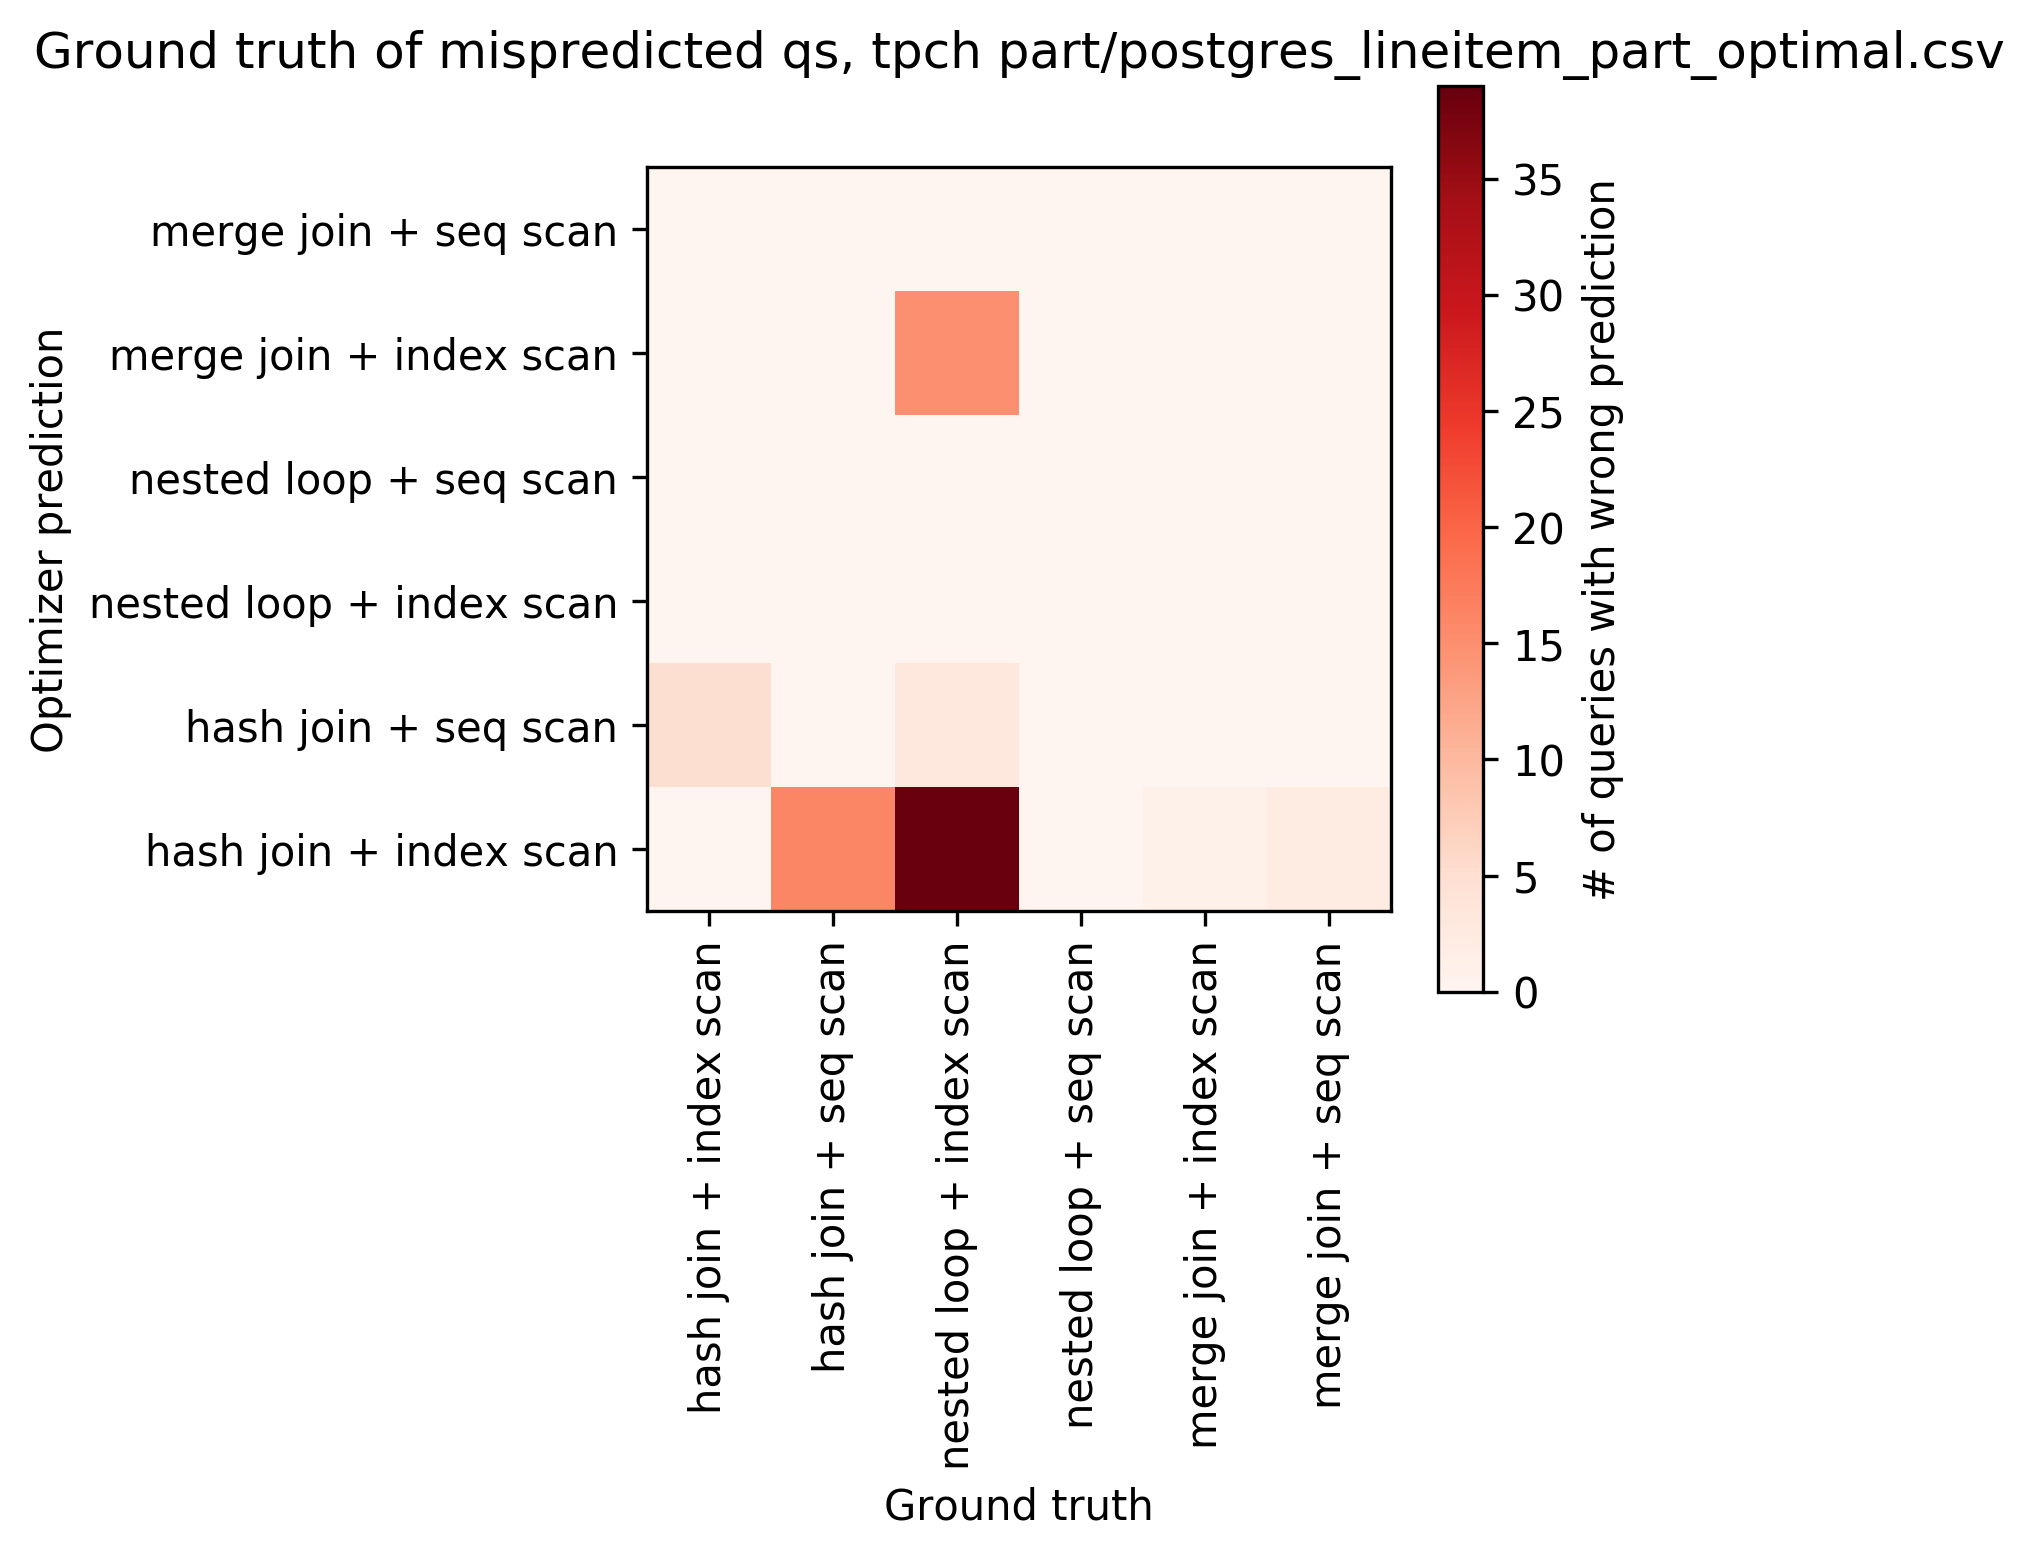

<Figure size 432x288 with 0 Axes>

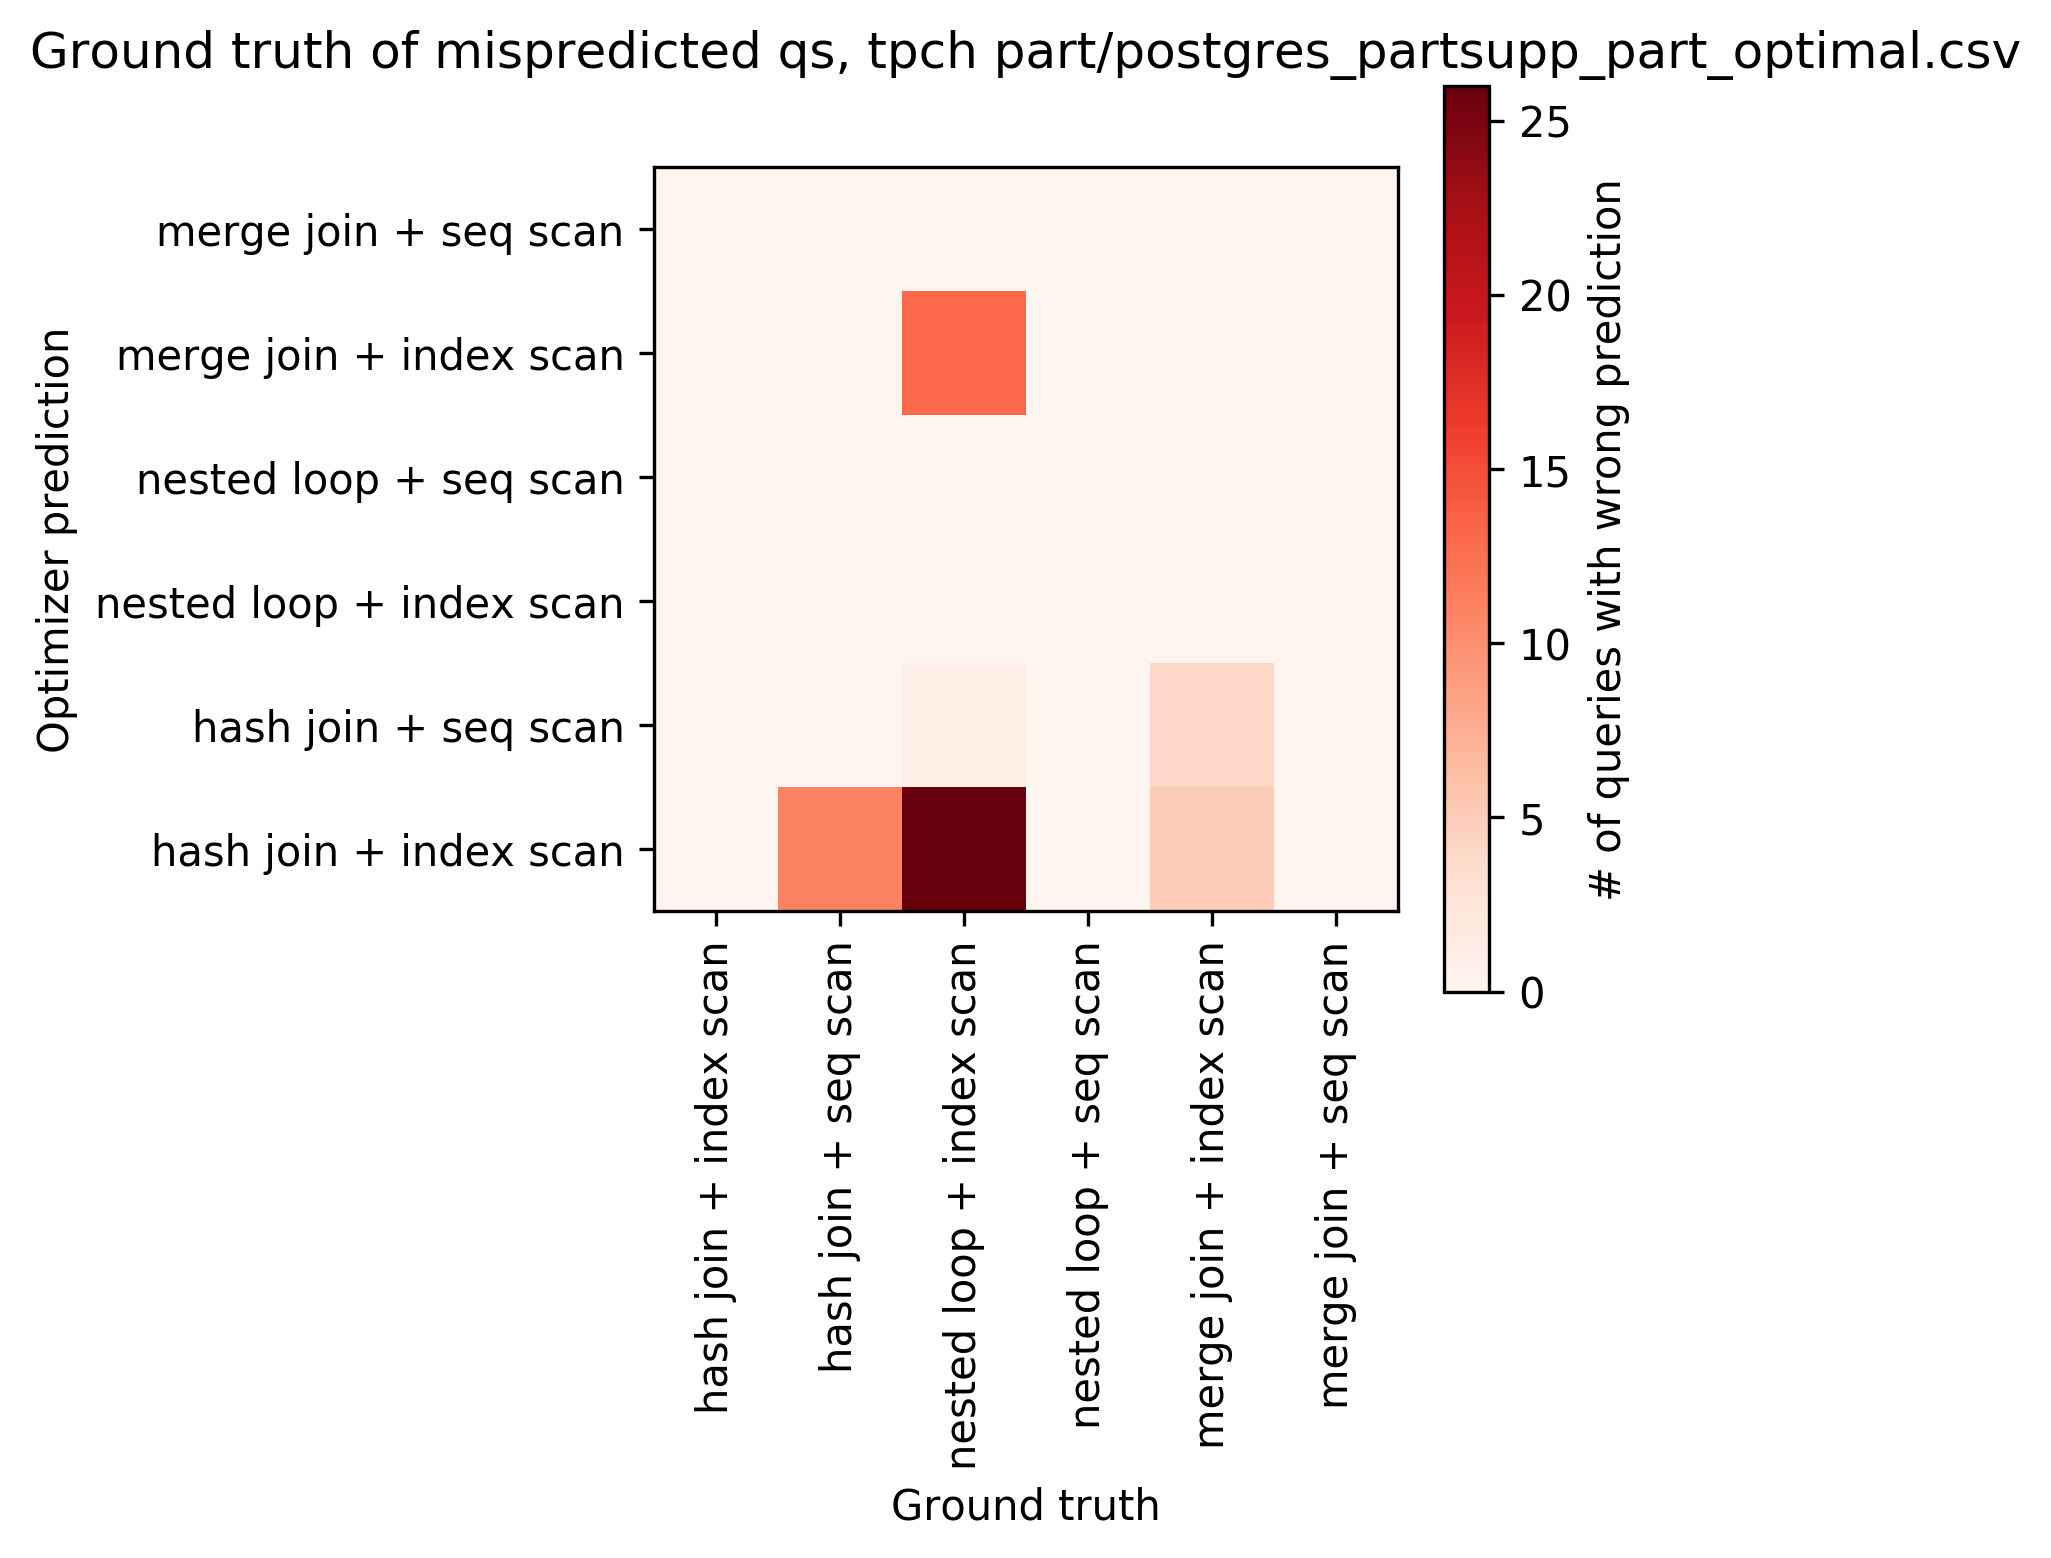

In [9]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
op_names = ['hash join + index scan', 'hash join + seq scan', 'nested loop + index scan', 'nested loop + seq scan',
              'merge join + index scan', 'merge join + seq scan']

present_idxs = range(len(gt_one_file_dss))
N = 100

for f_cnt in present_idxs:
    
    err_matrix = np.zeros([6, 6])
    
    gt_ds = gt_one_file_dss[f_cnt].head(N)
    
    # ====================================================================
    X = gt_ds[features]
    y = gt_ds['optimal_decision'].to_numpy()
    X_costs = gt_ds[dl.regression_targets].to_numpy()
    # ====================================================================
    
    est_ds = estimated_one_file_dss[f_cnt].head(N)
    # ====================================================================
    est_y = est_ds['optimal_decision'].to_numpy()    
    # ====================================================================
    
    for i in range(len(y)):
        if y[i] != est_y[i]:
            err_matrix[est_y[i], y[i]] += 1

    plt.clf()
    plt.figure(figsize=(4, 4), dpi=300)
    # create discrete colormap
    cmap = plt.cm.get_cmap('Reds')

#     fig, ax = plt.subplots()
    err_matrix = np.flip(err_matrix, axis=0)
    plt.imshow(err_matrix, cmap=cmap)
    
    plt.xticks(ticks = [0, 1, 2, 3, 4, 5] ,labels = op_names,rotation = 'vertical');
    plt.yticks(ticks = [5, 4,3,2,1,0] ,labels = op_names);
    plt.xlabel("Ground truth")
    plt.ylabel("Optimizer prediction")
    
    clb = plt.colorbar()
    clb.set_label('# of queries with wrong prediction', rotation='vertical')
    plt.title(f"Ground truth of mispredicted qs, {estimated_one_file_names[f_cnt]}",  y=1.1)
    
    plt.show()



# draw gridlines
# ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
# ax.set_xticks(np.arange(-.5, 10, 1));
# ax.set_yticks(np.arange(-.5, 10, 1));



# Ground truth of mispredicted queries

<Figure size 432x288 with 0 Axes>

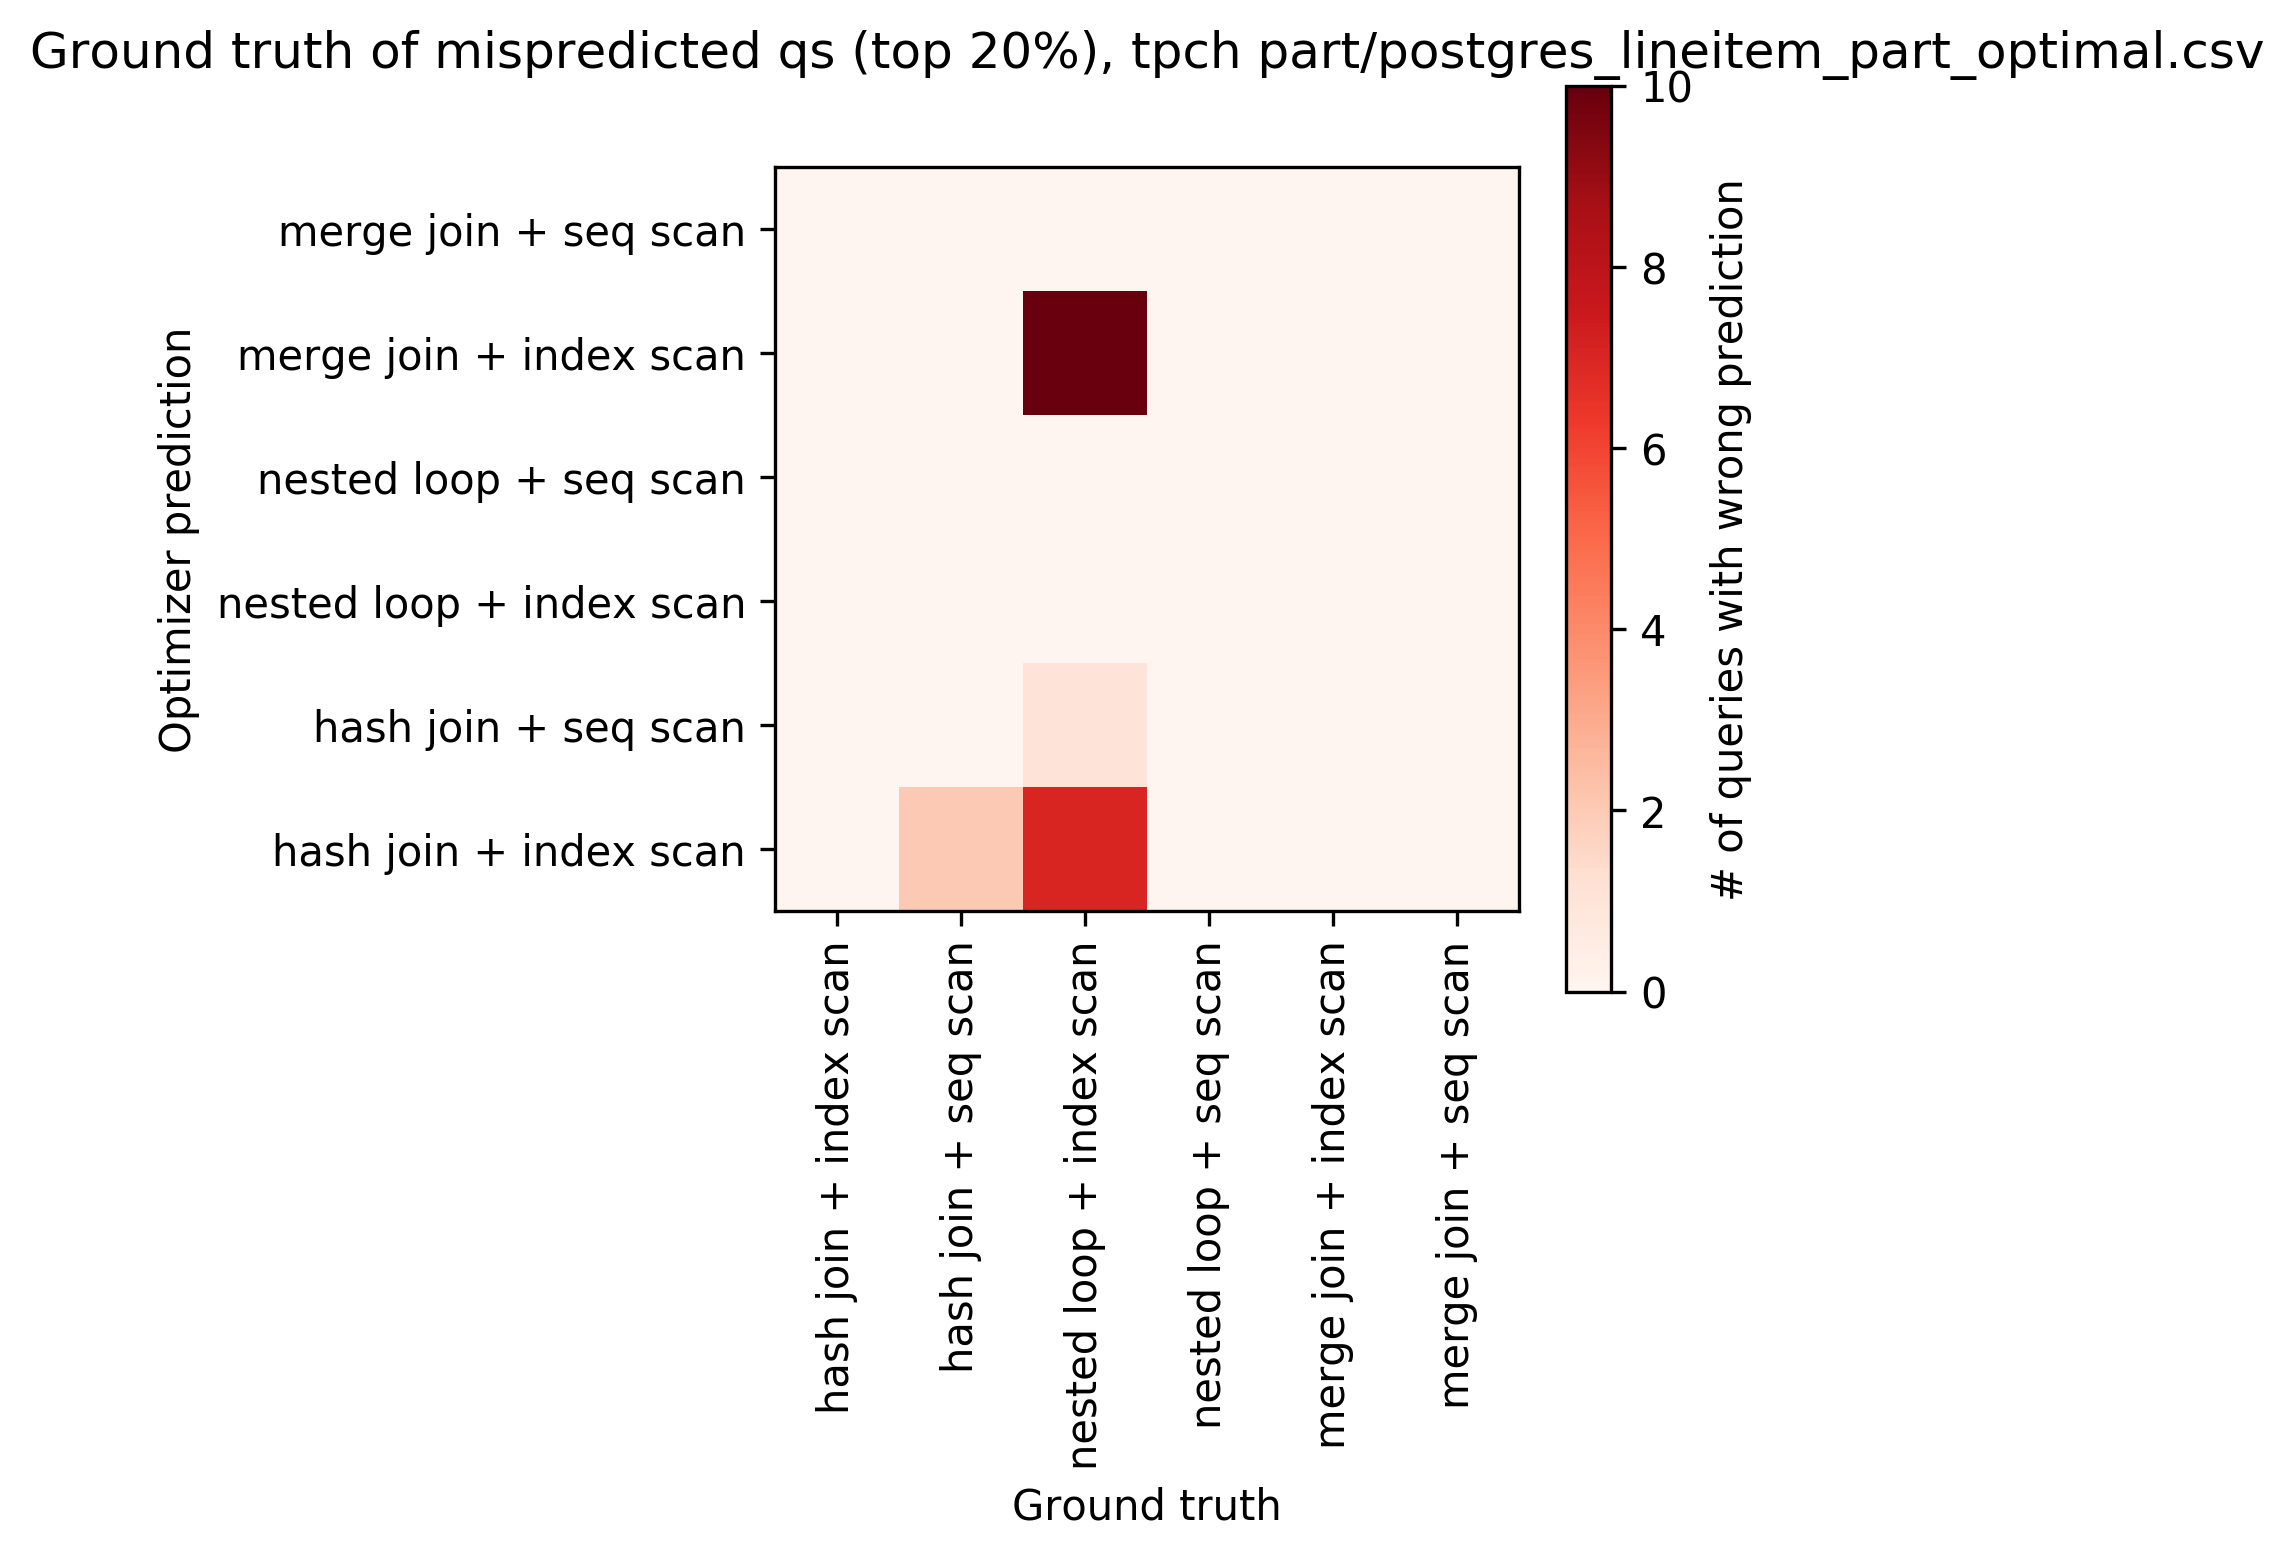

<Figure size 432x288 with 0 Axes>

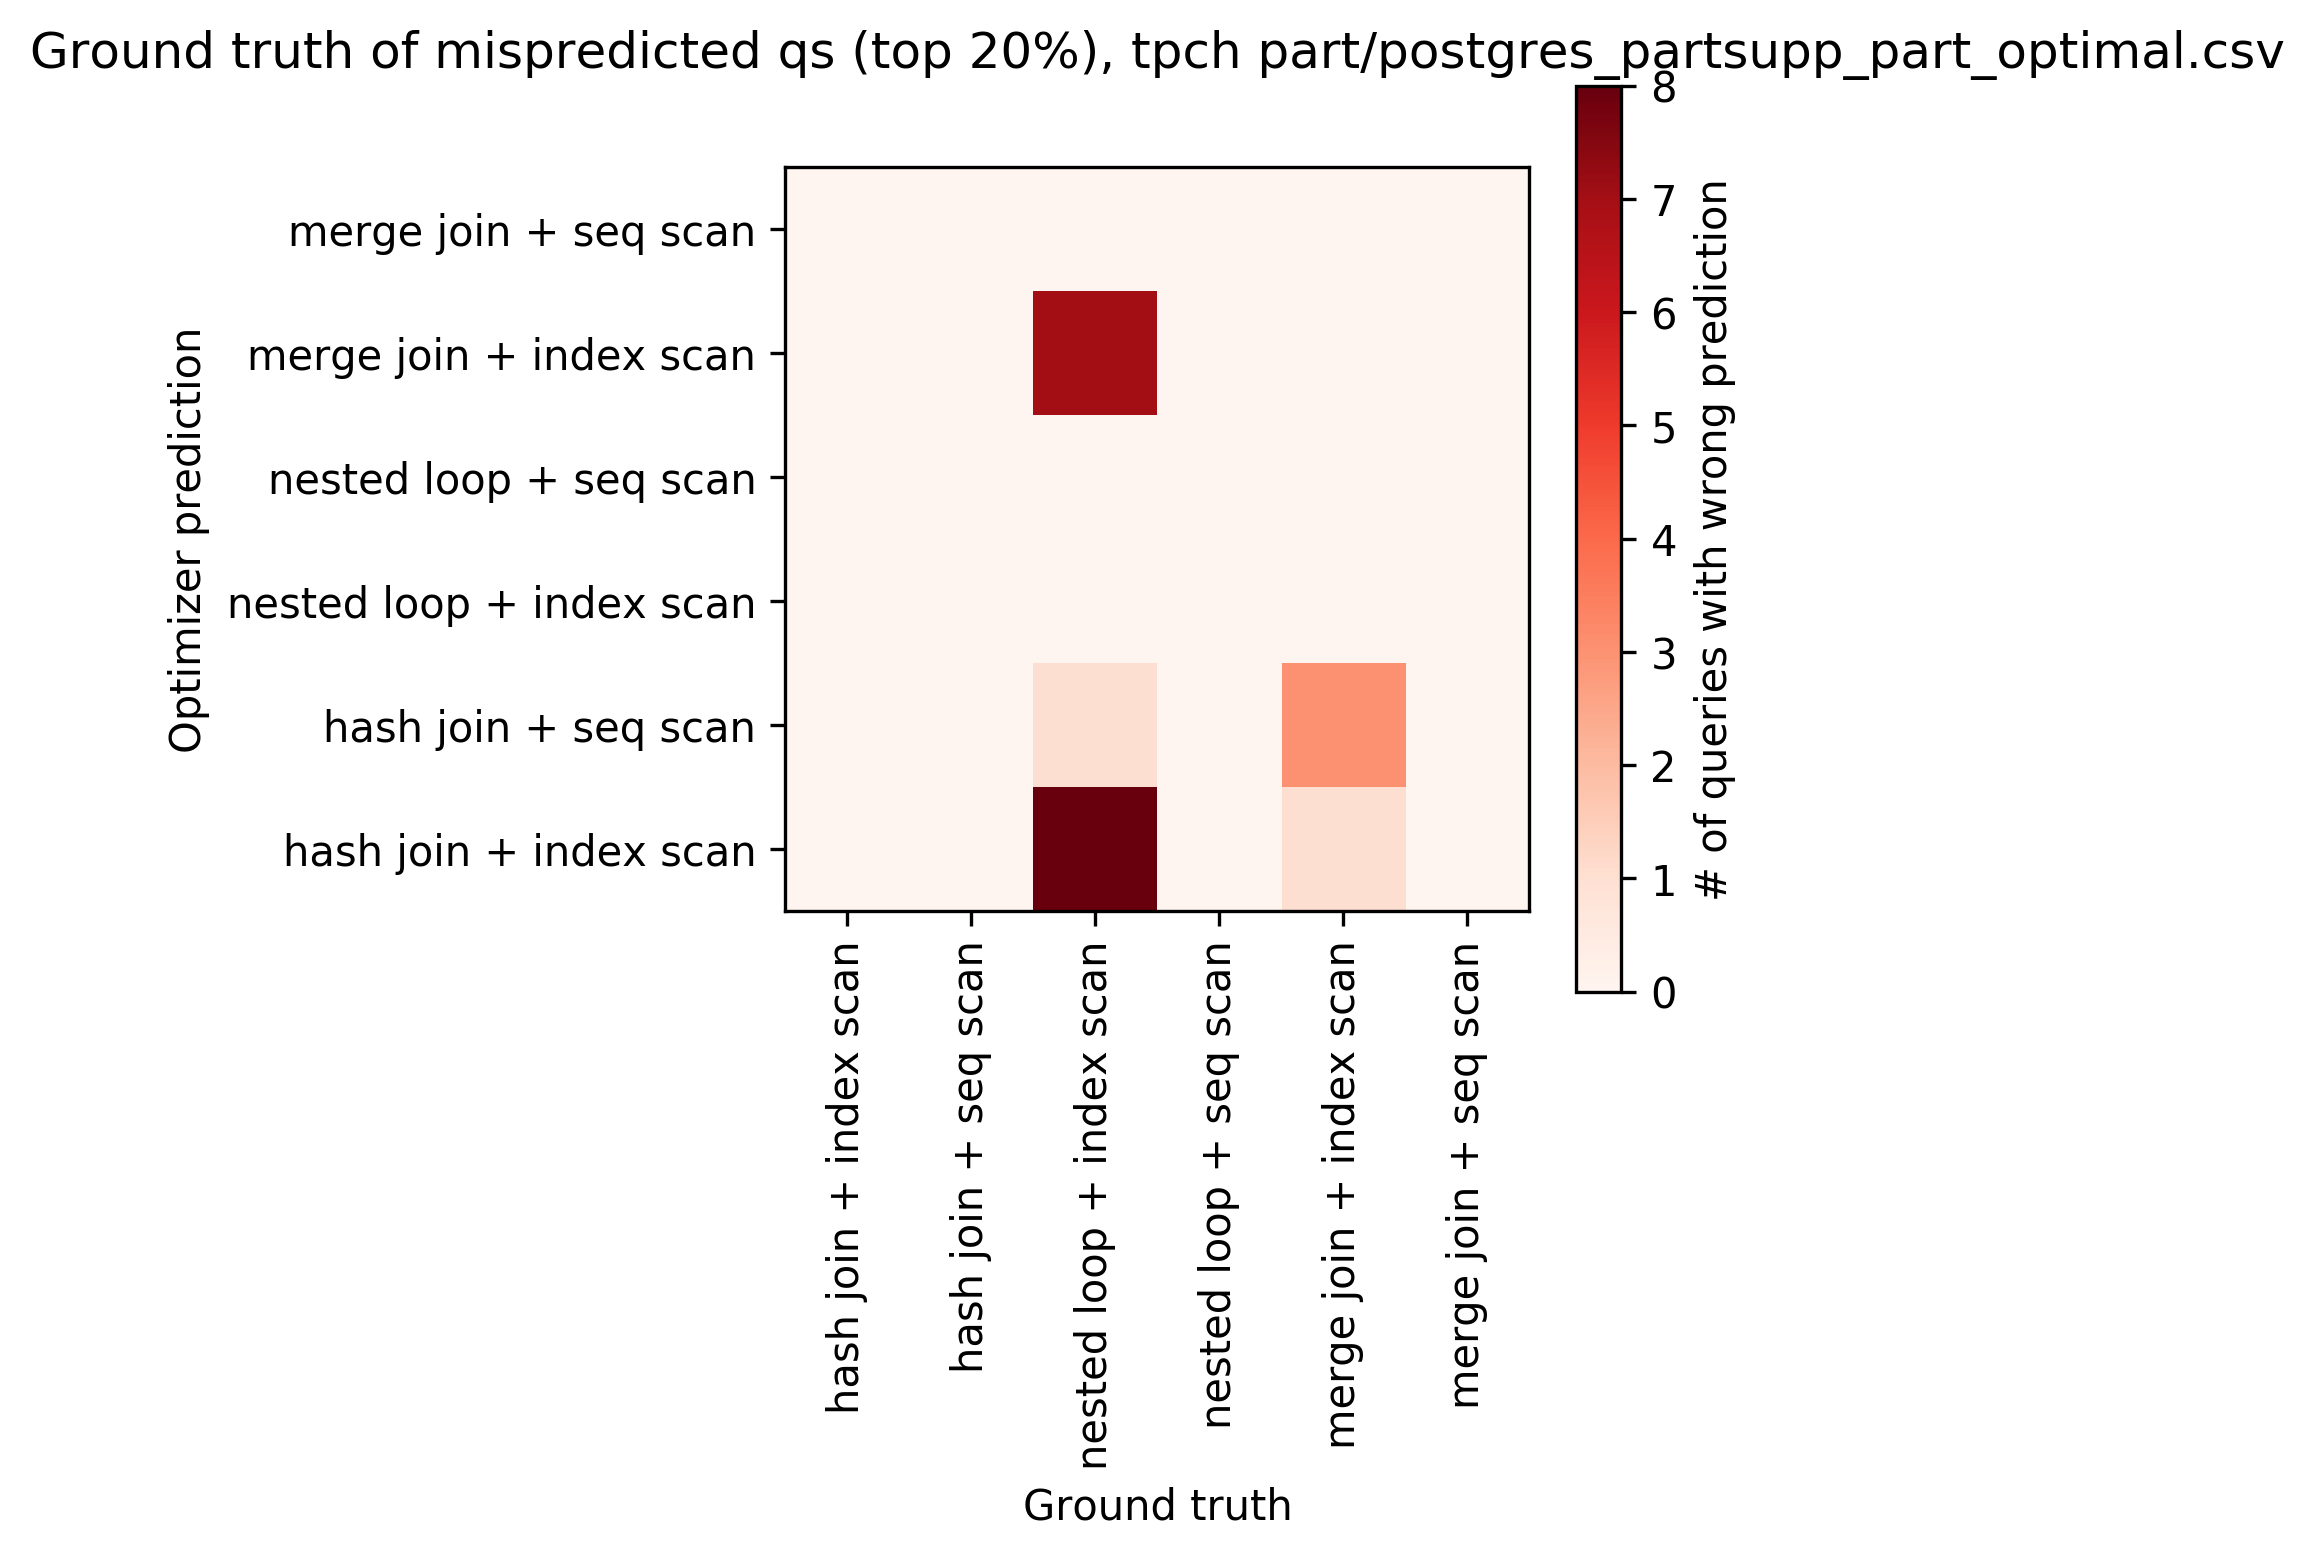

In [10]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
op_names = ['hash join + index scan', 'hash join + seq scan', 'nested loop + index scan', 'nested loop + seq scan',
              'merge join + index scan', 'merge join + seq scan']

present_idxs = range(len(gt_one_file_dss))
N = 100

for f_cnt in present_idxs:
    
    err_matrix = np.zeros([6, 6])
    
    gt_ds = gt_one_file_dss[f_cnt].head(N)
    
    # ====================================================================
    X = gt_ds[features]
    y = gt_ds['optimal_decision'].to_numpy()
    X_costs = gt_ds[dl.regression_targets].to_numpy()
    # ====================================================================
    
    est_ds = estimated_one_file_dss[f_cnt].head(N)
    # ====================================================================
    est_y = est_ds['optimal_decision'].to_numpy()
    # ====================================================================
    
    X_cost_diff = []
    for i in range(len(y)):
        X_cost_diff.append(X_costs[i, est_y[i]] - X_costs[i, y[i]])
    
    top_20_cost_diff = sorted(X_cost_diff)[-20]
    
    for i in range(len(y)):
        if y[i] != est_y[i] and X_costs[i, est_y[i]] - X_costs[i, y[i]] >= top_20_cost_diff:
            err_matrix[est_y[i], y[i]] += 1


    plt.clf()
    plt.figure(figsize=(4, 4), dpi=300)
    # create discrete colormap
    cmap = plt.cm.get_cmap('Reds')

#     fig, ax = plt.subplots()
    err_matrix = np.flip(err_matrix, axis=0)
    plt.imshow(err_matrix, cmap=cmap)
    
    plt.xticks(ticks = [0, 1, 2, 3, 4, 5] ,labels = op_names,rotation = 'vertical');
    plt.yticks(ticks = [5, 4,3,2,1,0] ,labels = op_names);
    plt.xlabel("Ground truth")
    plt.ylabel("Optimizer prediction")
    plt.title(f"Ground truth of mispredicted qs (top 20%), {estimated_one_file_names[f_cnt]}",  y=1.1)
    
    clb = plt.colorbar()
    clb.set_label('# of queries with wrong prediction', rotation='vertical')
    plt.show()




# Estimated Space

100%|██████████| 100/100 [00:10<00:00,  9.69it/s]


<Figure size 432x288 with 0 Axes>

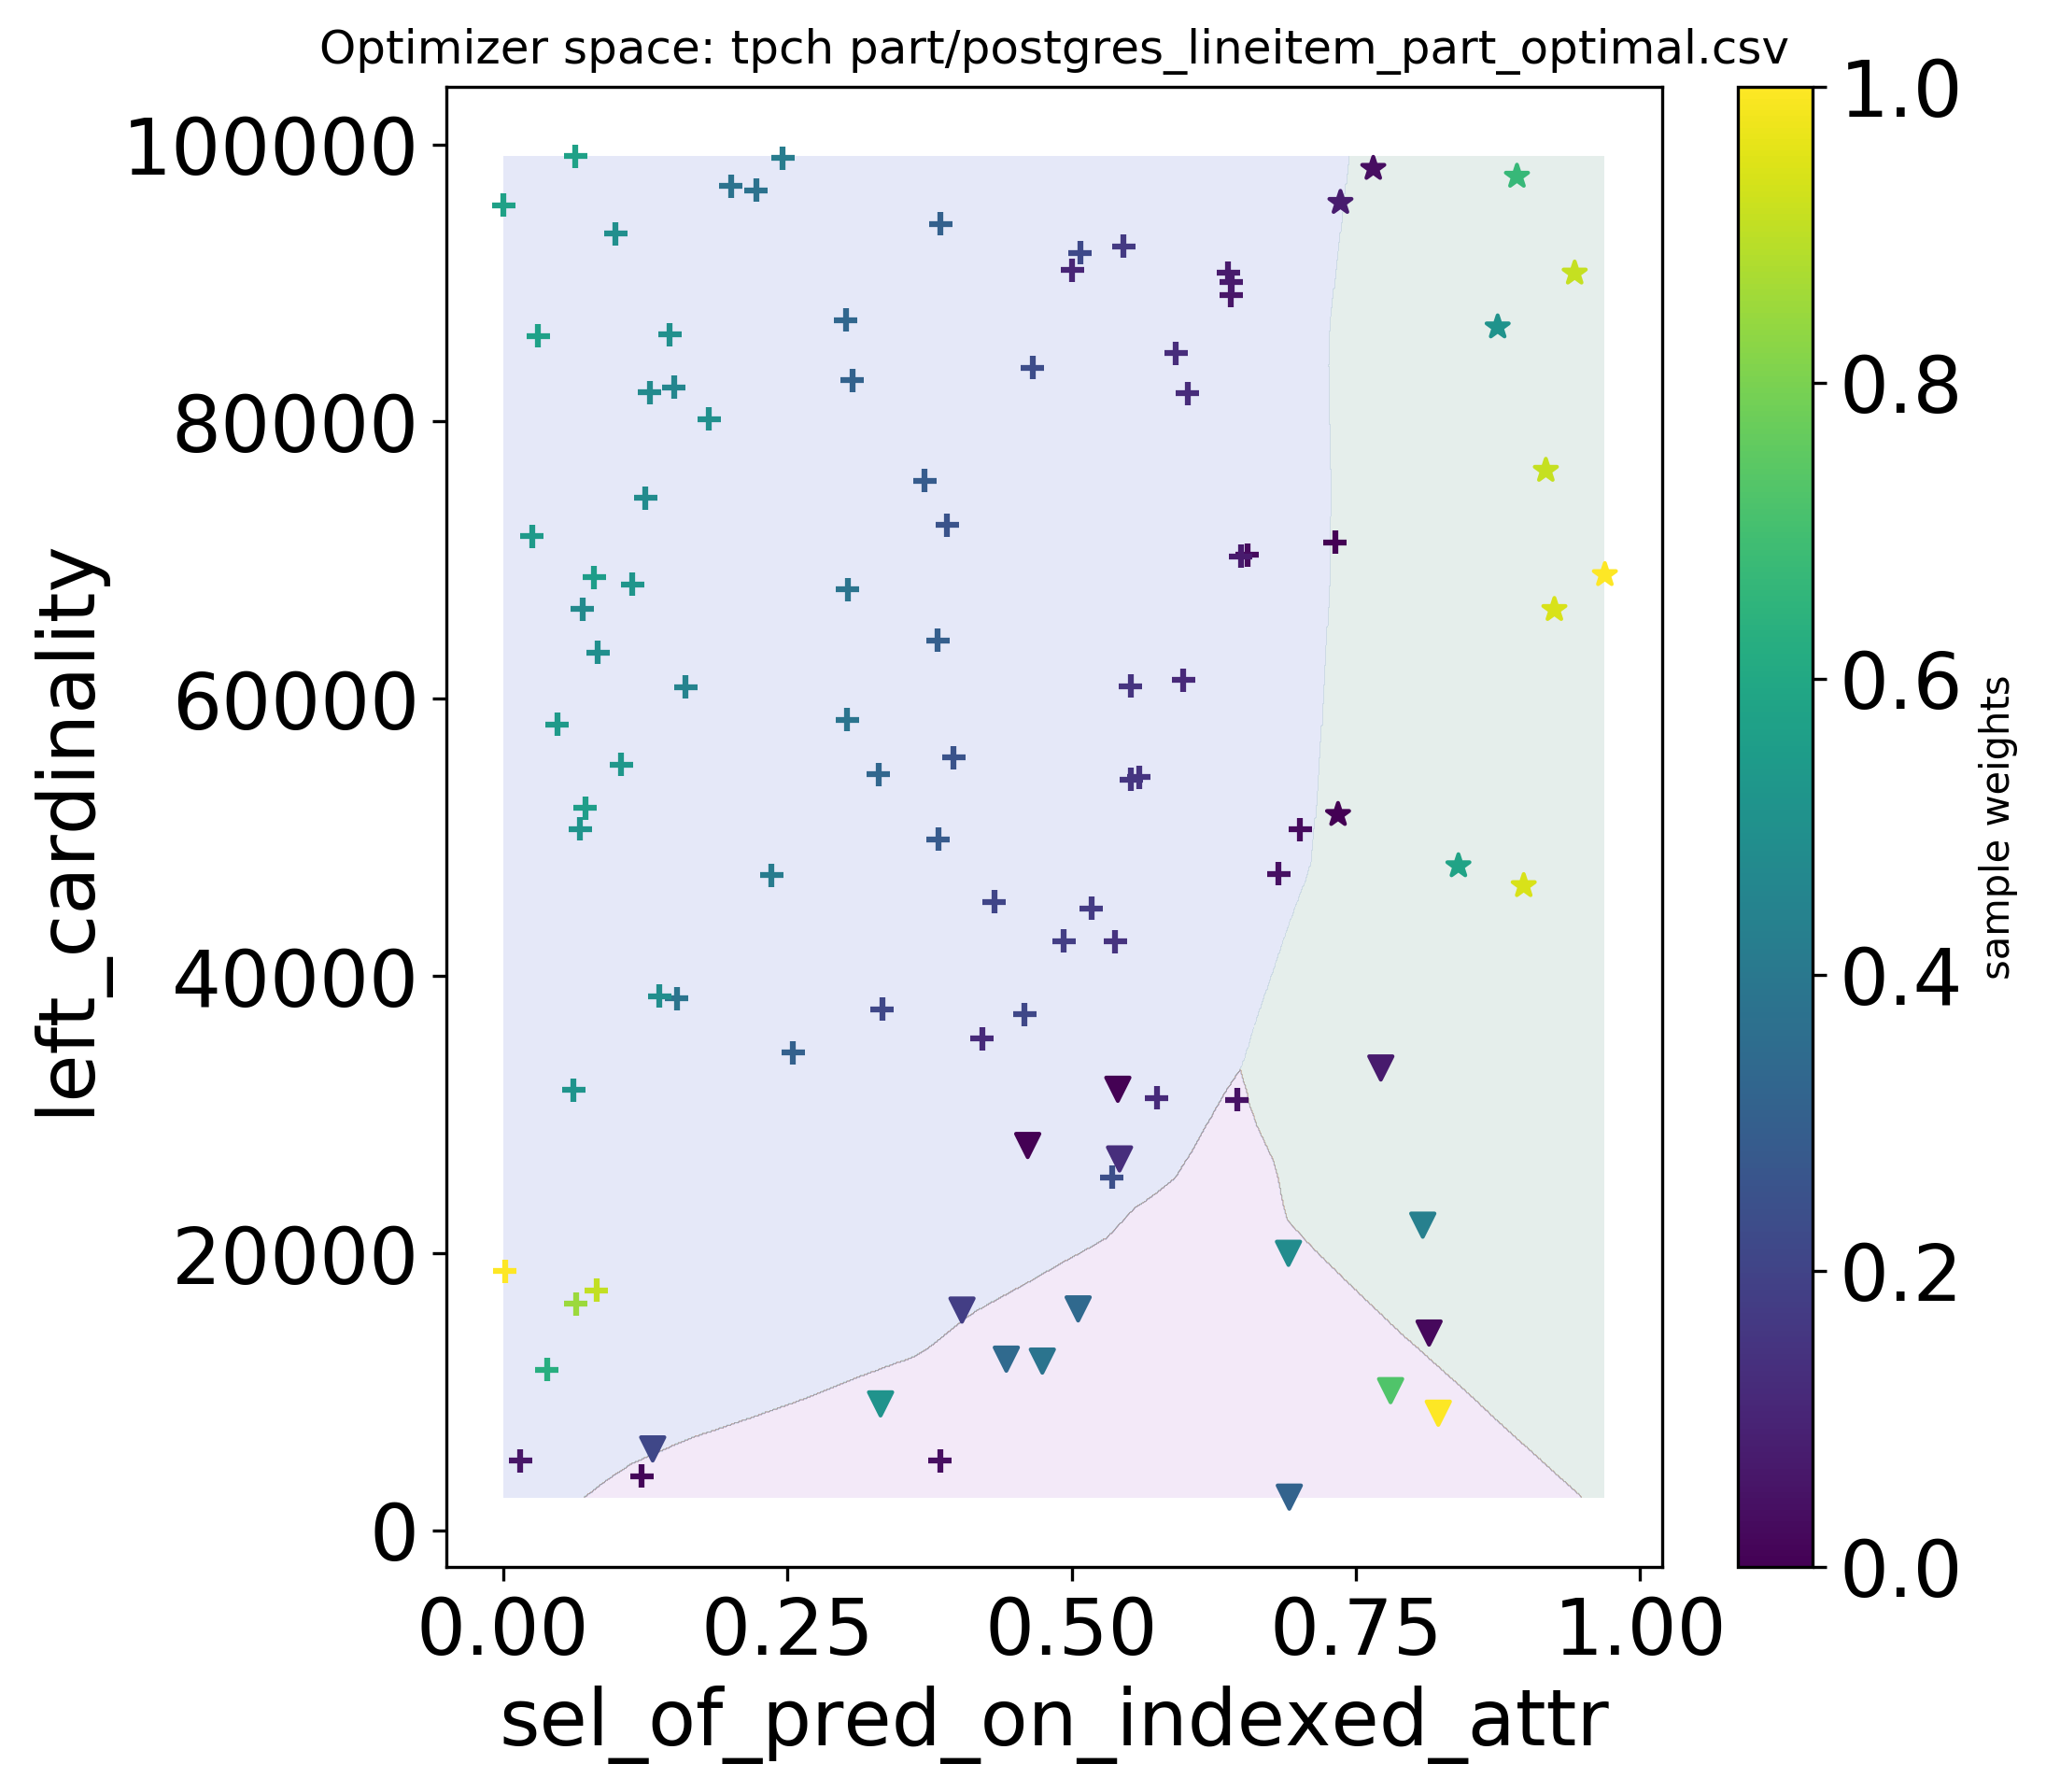

100%|██████████| 100/100 [00:09<00:00, 10.59it/s]


<Figure size 432x288 with 0 Axes>

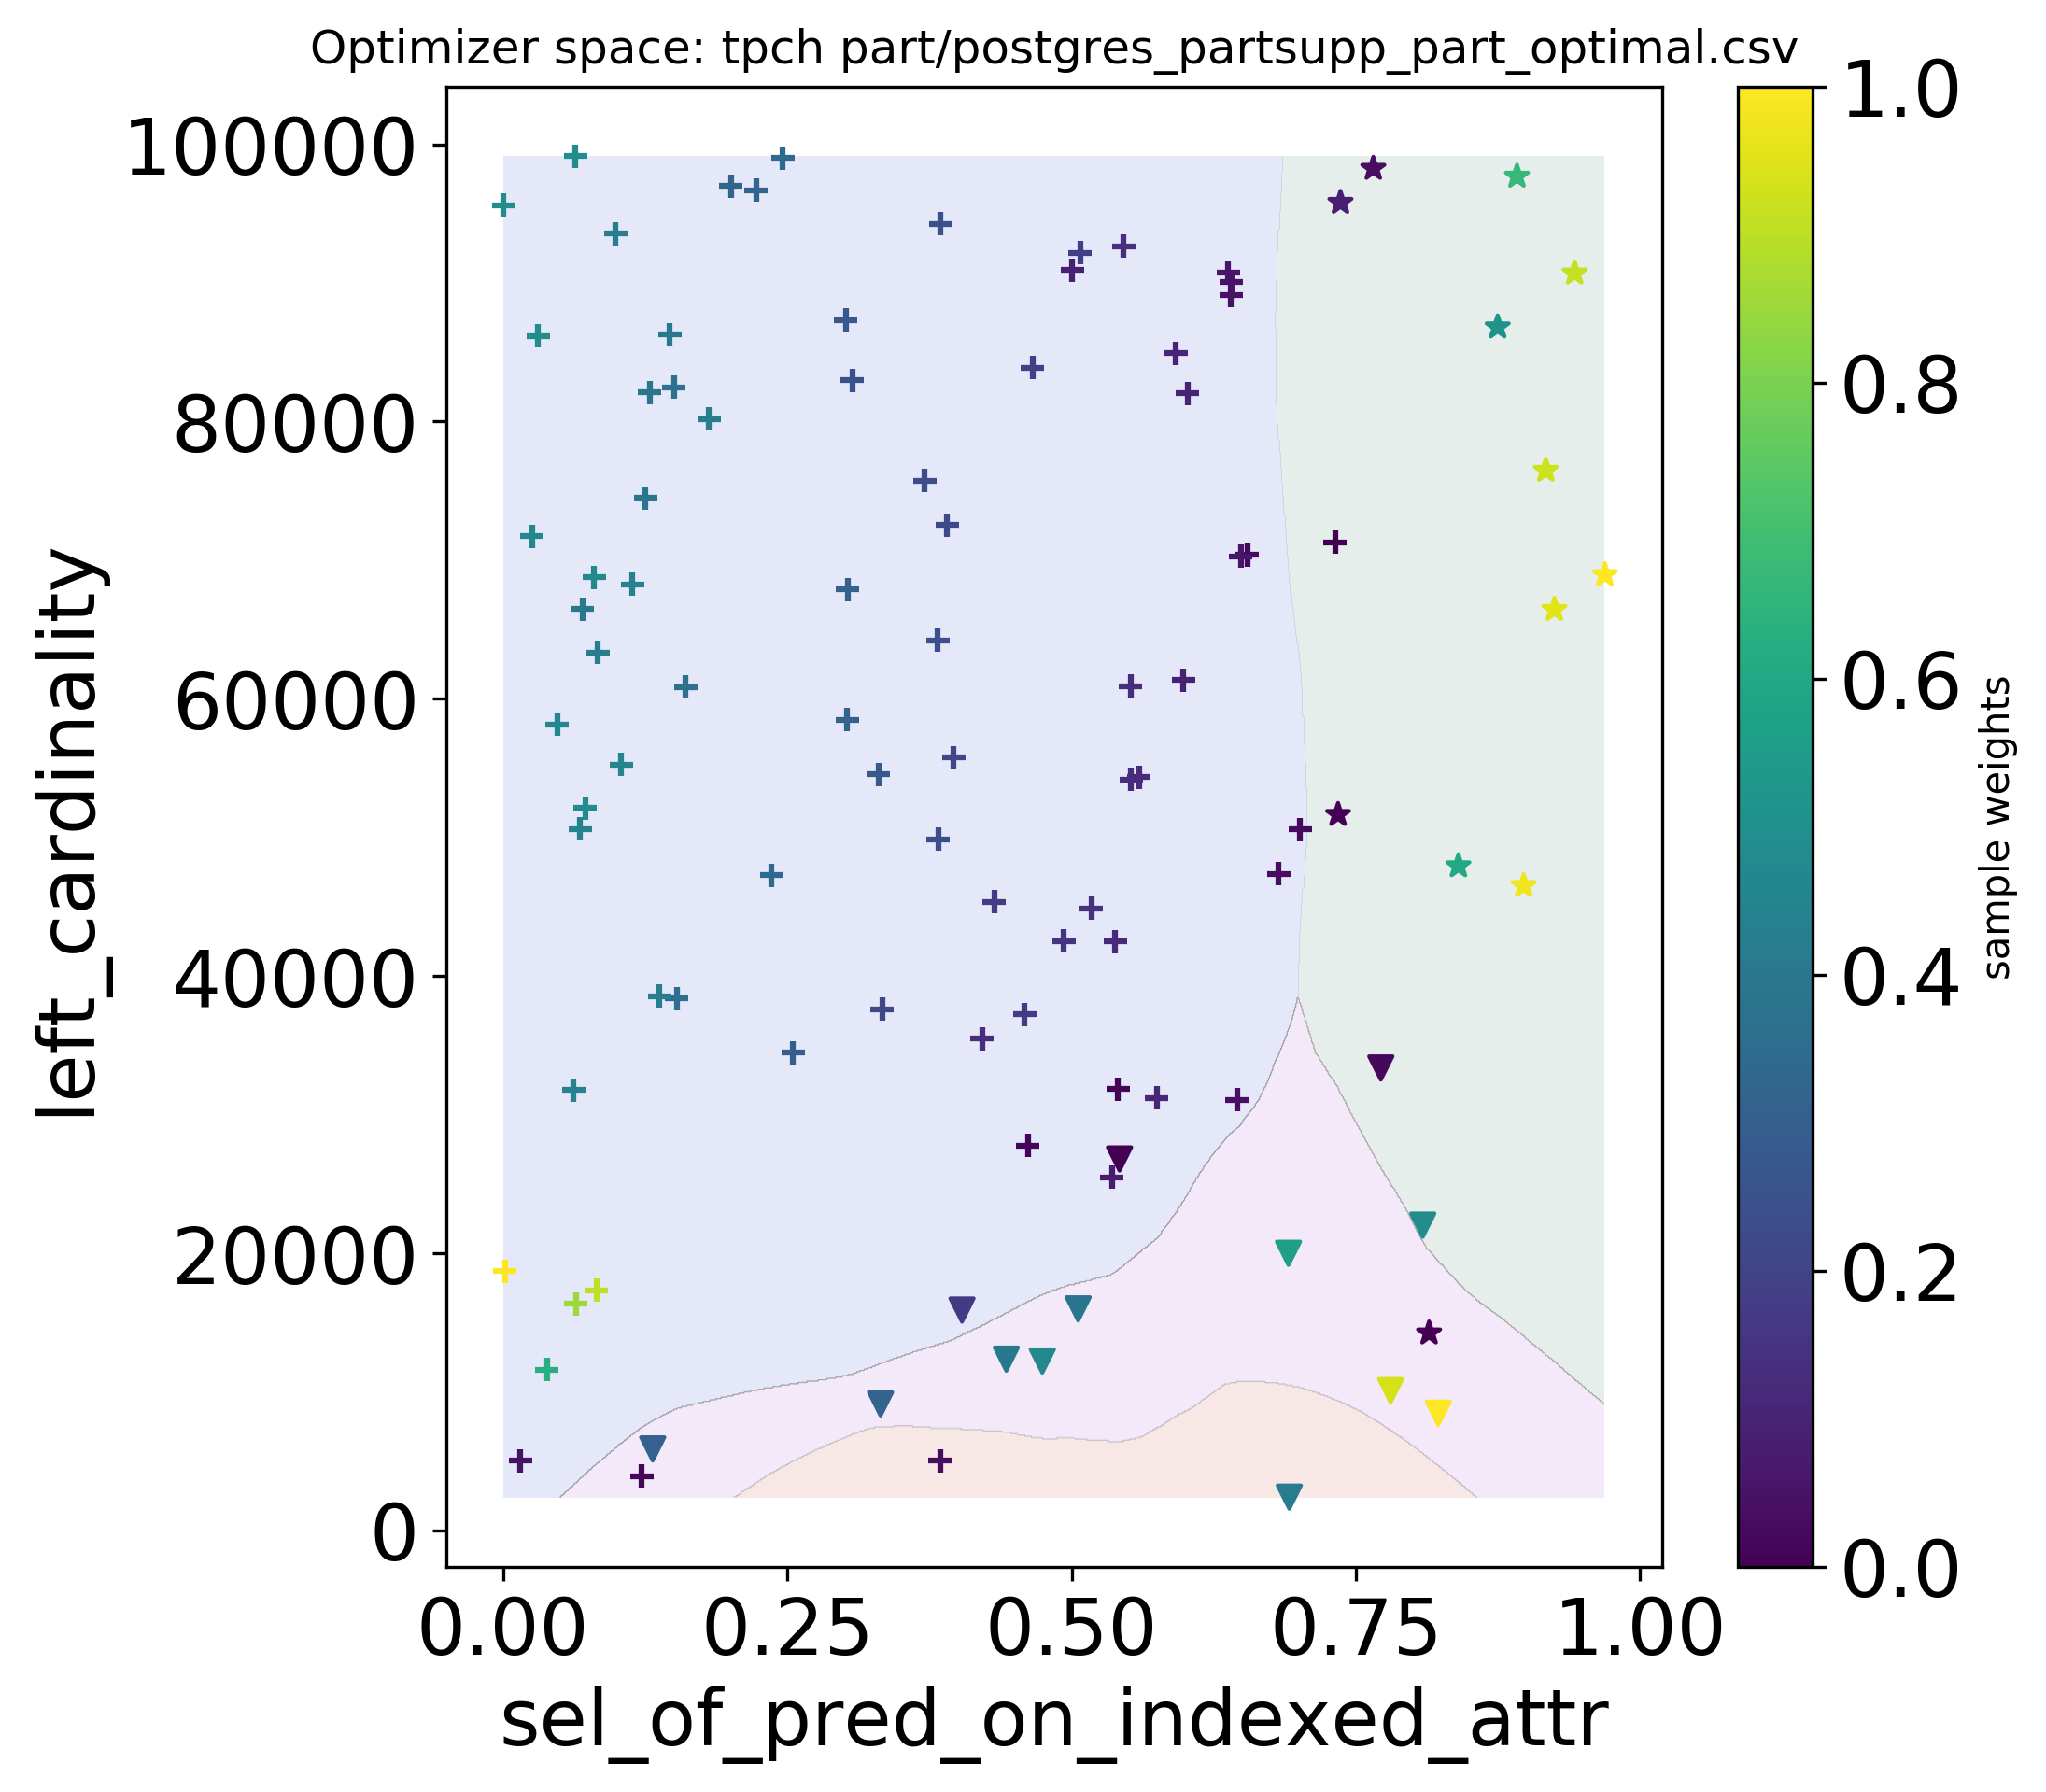

In [11]:
present_idxs = range(len(gt_one_file_dss))
N = 100
models = []
scalers = []

for f_cnt in present_idxs:
    
    ds = estimated_one_file_dss[f_cnt]
    
    # ====================================================================
    X = ds[features]
    y = ds['optimal_decision']
    X_costs = ds[dl.regression_targets]

    from sklearn.model_selection import train_test_split
    from sklearn import preprocessing

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)
    X_train_costs, _, _, _, = train_test_split(X_costs, y, train_size=0.8, random_state=1)
    X_train, X_test, y_train, y_test = \
        X_train.to_numpy(),X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

    X_train_weights = calculate_importance_from_costs(X_train_costs.to_numpy())

    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)

    # scaler = preprocessing.StandardScaler().fit(X_test)
    X_test = scaler.transform(X_test)

    X_train_weights = preprocessing.MinMaxScaler().fit_transform(X_train_weights.reshape(-1,1)).flatten()
    # ====================================================================
    
    clf = MLPClassifier().fit(X_train, y_train, sample_weight=X_train_weights, max_iter=100)
    
    ds = estimated_one_file_dss[f_cnt].head(N)
    
    # ====================================================================
    X = ds[features]
    y = ds['optimal_decision']
    X_costs = ds[dl.regression_targets]
    # ====================================================================
    

    plot_2d_decision_boundaries(clf, X.to_numpy(), X_costs.to_numpy(), y.to_numpy(), title=f'Optimizer space: {estimated_one_file_names[f_cnt]}', 
                                        x_label=features[0], y_label=features[1], scaler=scaler, 
                                        filename=None, plot_colorbar=True)
    plt.show()
    models.append(clf)
    scalers.append(scaler)

# Groundtruth Space

In [12]:
# present_idxs = range(len(gt_one_file_dss))
# N = 100

# for f_cnt in present_idxs:
    
    
#     ds = estimated_one_file_dss[f_cnt].head(N)
#     # ====================================================================
#     X = ds[features]
#     y = ds['optimal_decision']
#     X_costs = ds[dl.regression_targets]

#     from sklearn.model_selection import train_test_split
#     from sklearn import preprocessing

#     X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)
#     X_train_costs, _, _, _, = train_test_split(X_costs, y, train_size=0.8, random_state=1)
#     X_train, X_test, y_train, y_test = \
#         X_train.to_numpy(),X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

#     X_train_weights = calculate_importance_from_costs(X_train_costs.to_numpy())

#     scaler = preprocessing.StandardScaler().fit(X_train)
#     X_train = scaler.transform(X_train)

#     # scaler = preprocessing.StandardScaler().fit(X_test)
#     X_test = scaler.transform(X_test)

#     X_train_weights = preprocessing.MinMaxScaler().fit_transform(X_train_weights.reshape(-1,1)).flatten()
#     # ====================================================================
    
#     ds = gt_one_file_dss[f_cnt].head(N)
#     # ====================================================================
# #     X = ds[features]
# #     y = ds['optimal_decision']
#     X_costs = ds[dl.regression_targets]
# #     X_est = ds[features_2d_plot].to_numpy()
#     # ====================================================================
    
# #     res_est = []
# #     for i in range(X_est.shape[0]):                
# #         res_est.append(tuple(X_est[i]))
    
    
#     clf = models[f_cnt]
#     scaler = scalers[f_cnt]
#     plt.clf()
#     plot_2d_decision_boundaries(clf, X.to_numpy(), X_costs.to_numpy(), y.to_numpy(), title=f' ', 
#                                         x_label=features[0], y_label=features[1], scaler=scaler, 
#                                         filename=None, plot_colorbar=False)
#     plt.show()

# Problematic area

tpch part/postgres_lineitem_part_optimal.csv
Optimizer accuracy: 0.19
Min, Max, Median running cost: 3408.719, 8553.529, 8432.2435
Min, Max, Median min cost - estimated min cost : 0.5080000000007203, 54.766999999999825, 11.854999999999563


<Figure size 432x288 with 0 Axes>

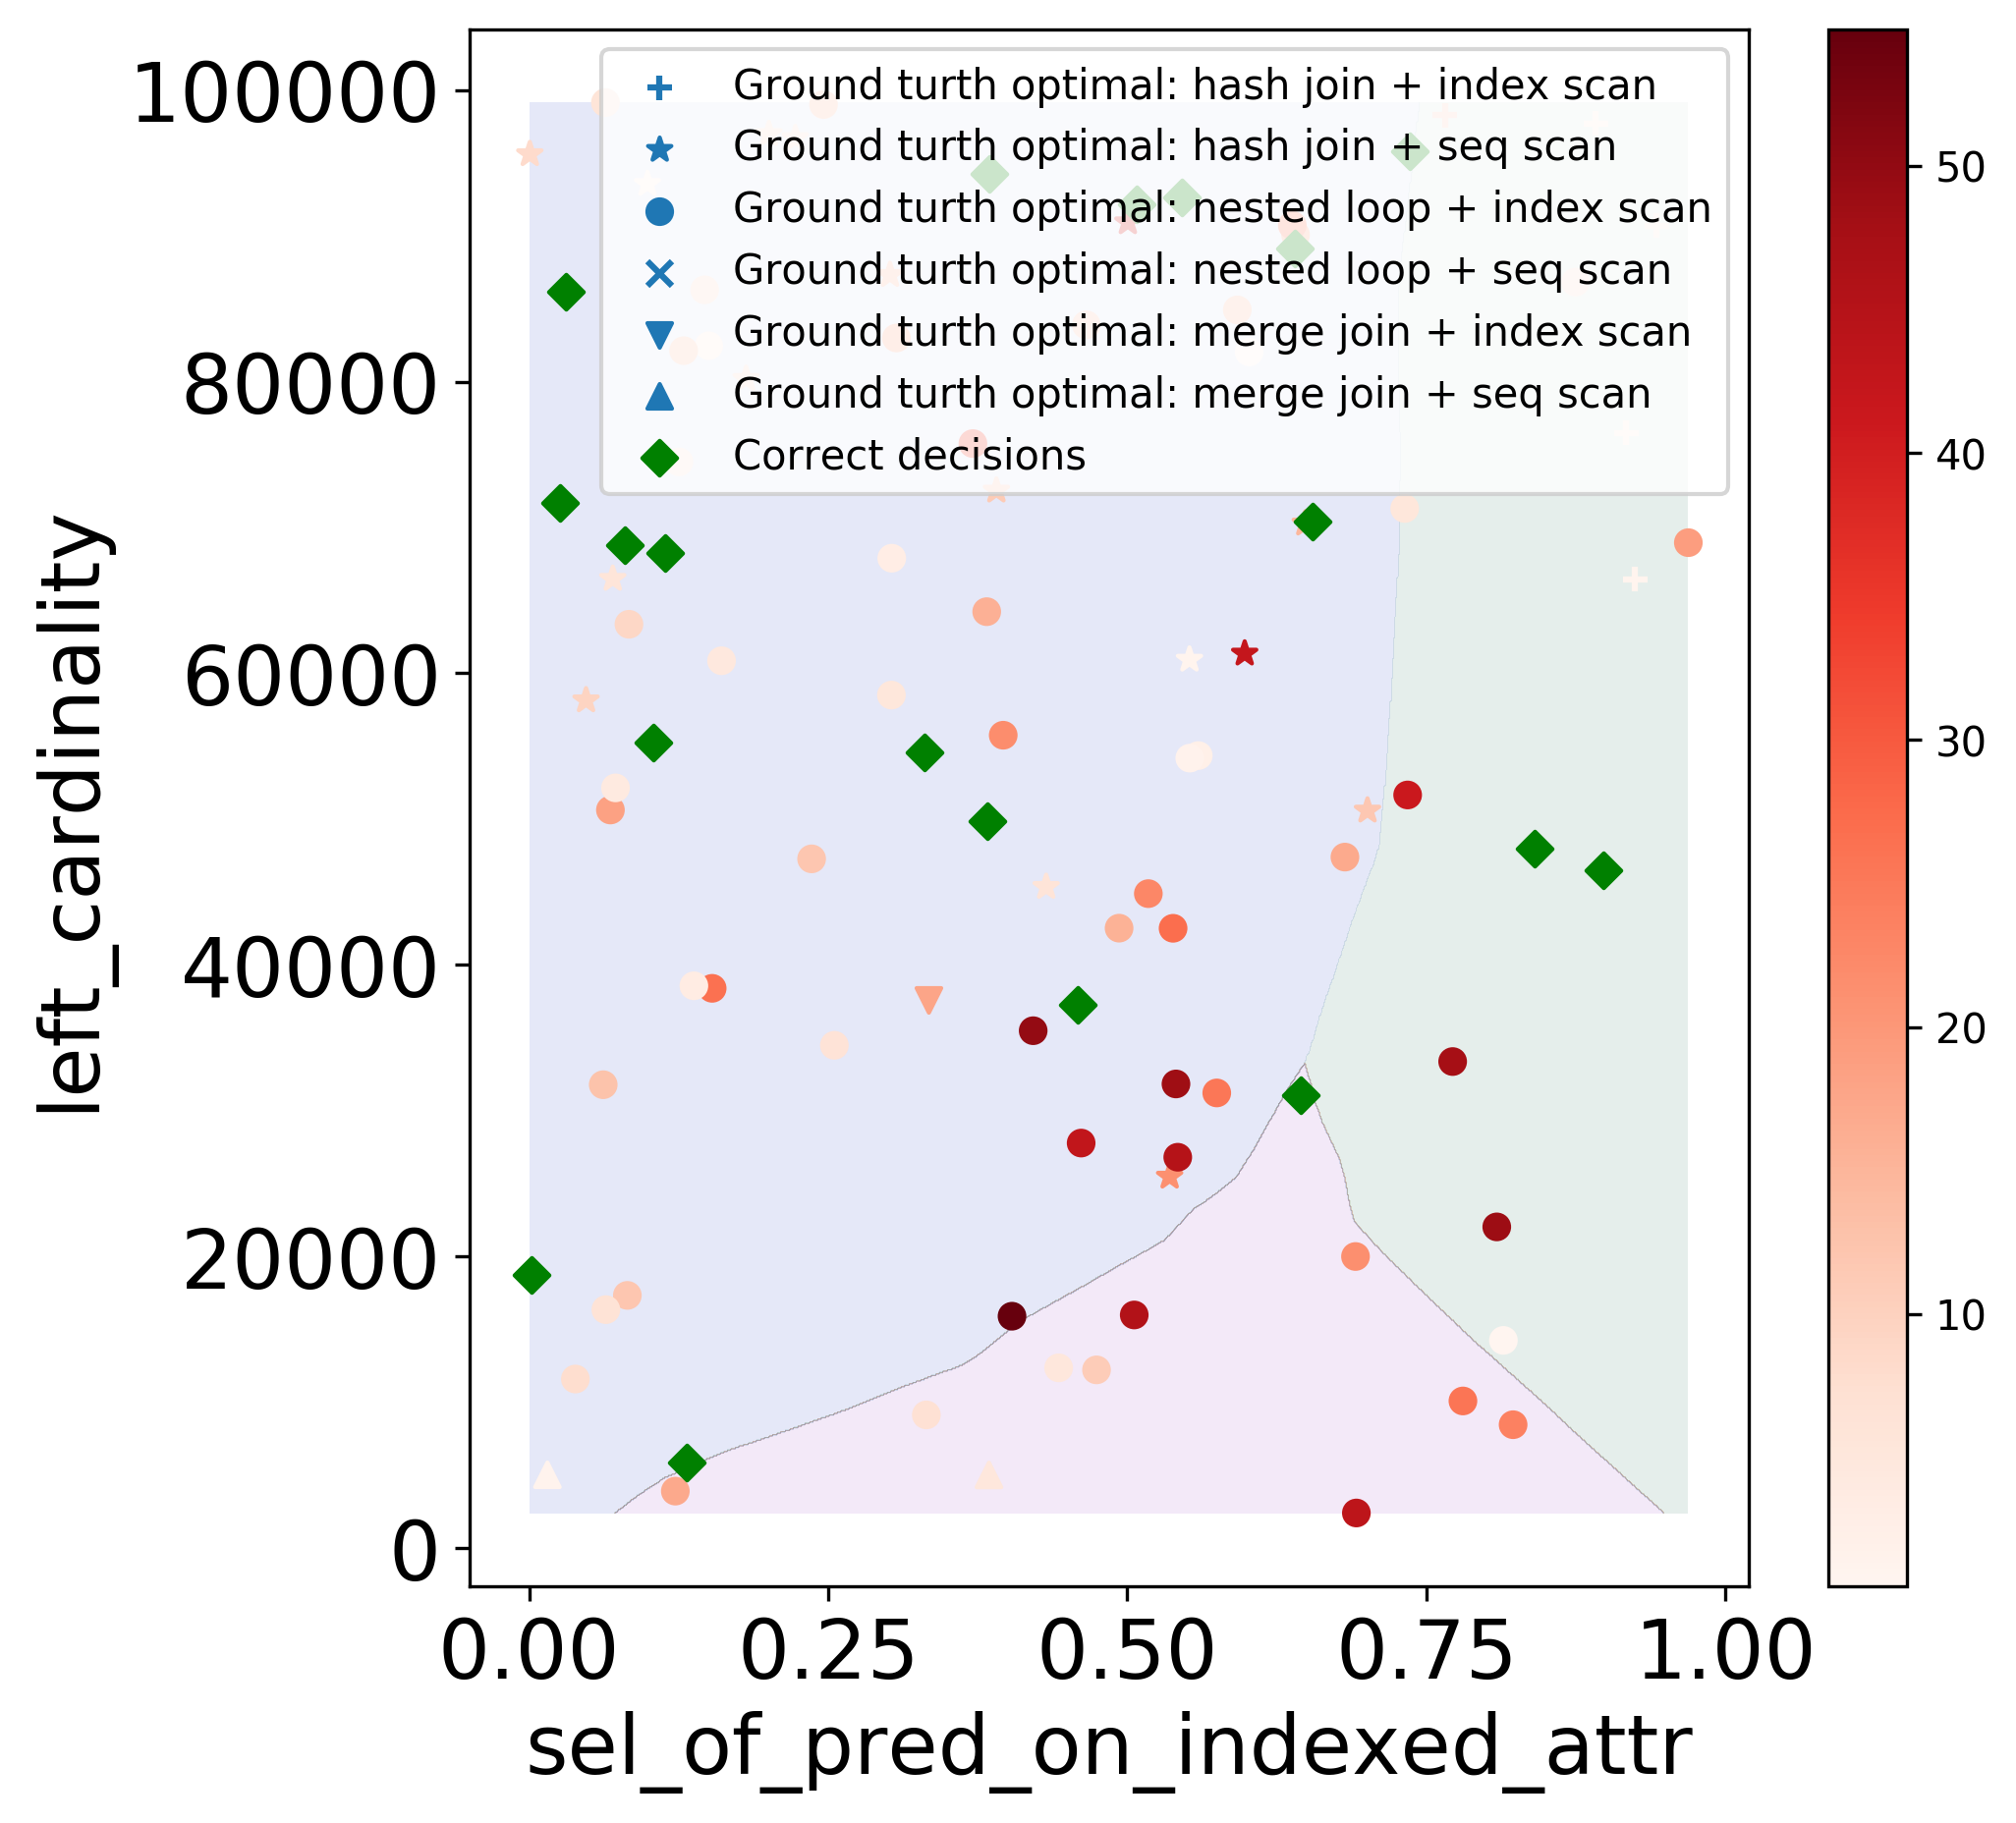

tpch part/postgres_partsupp_part_optimal.csv
Optimizer accuracy: 0.4
Min, Max, Median running cost: 290.065, 829.316, 735.249
Min, Max, Median min cost - estimated min cost : 0.17300000000000182, 79.02199999999993, 7.678999999999974


<Figure size 432x288 with 0 Axes>

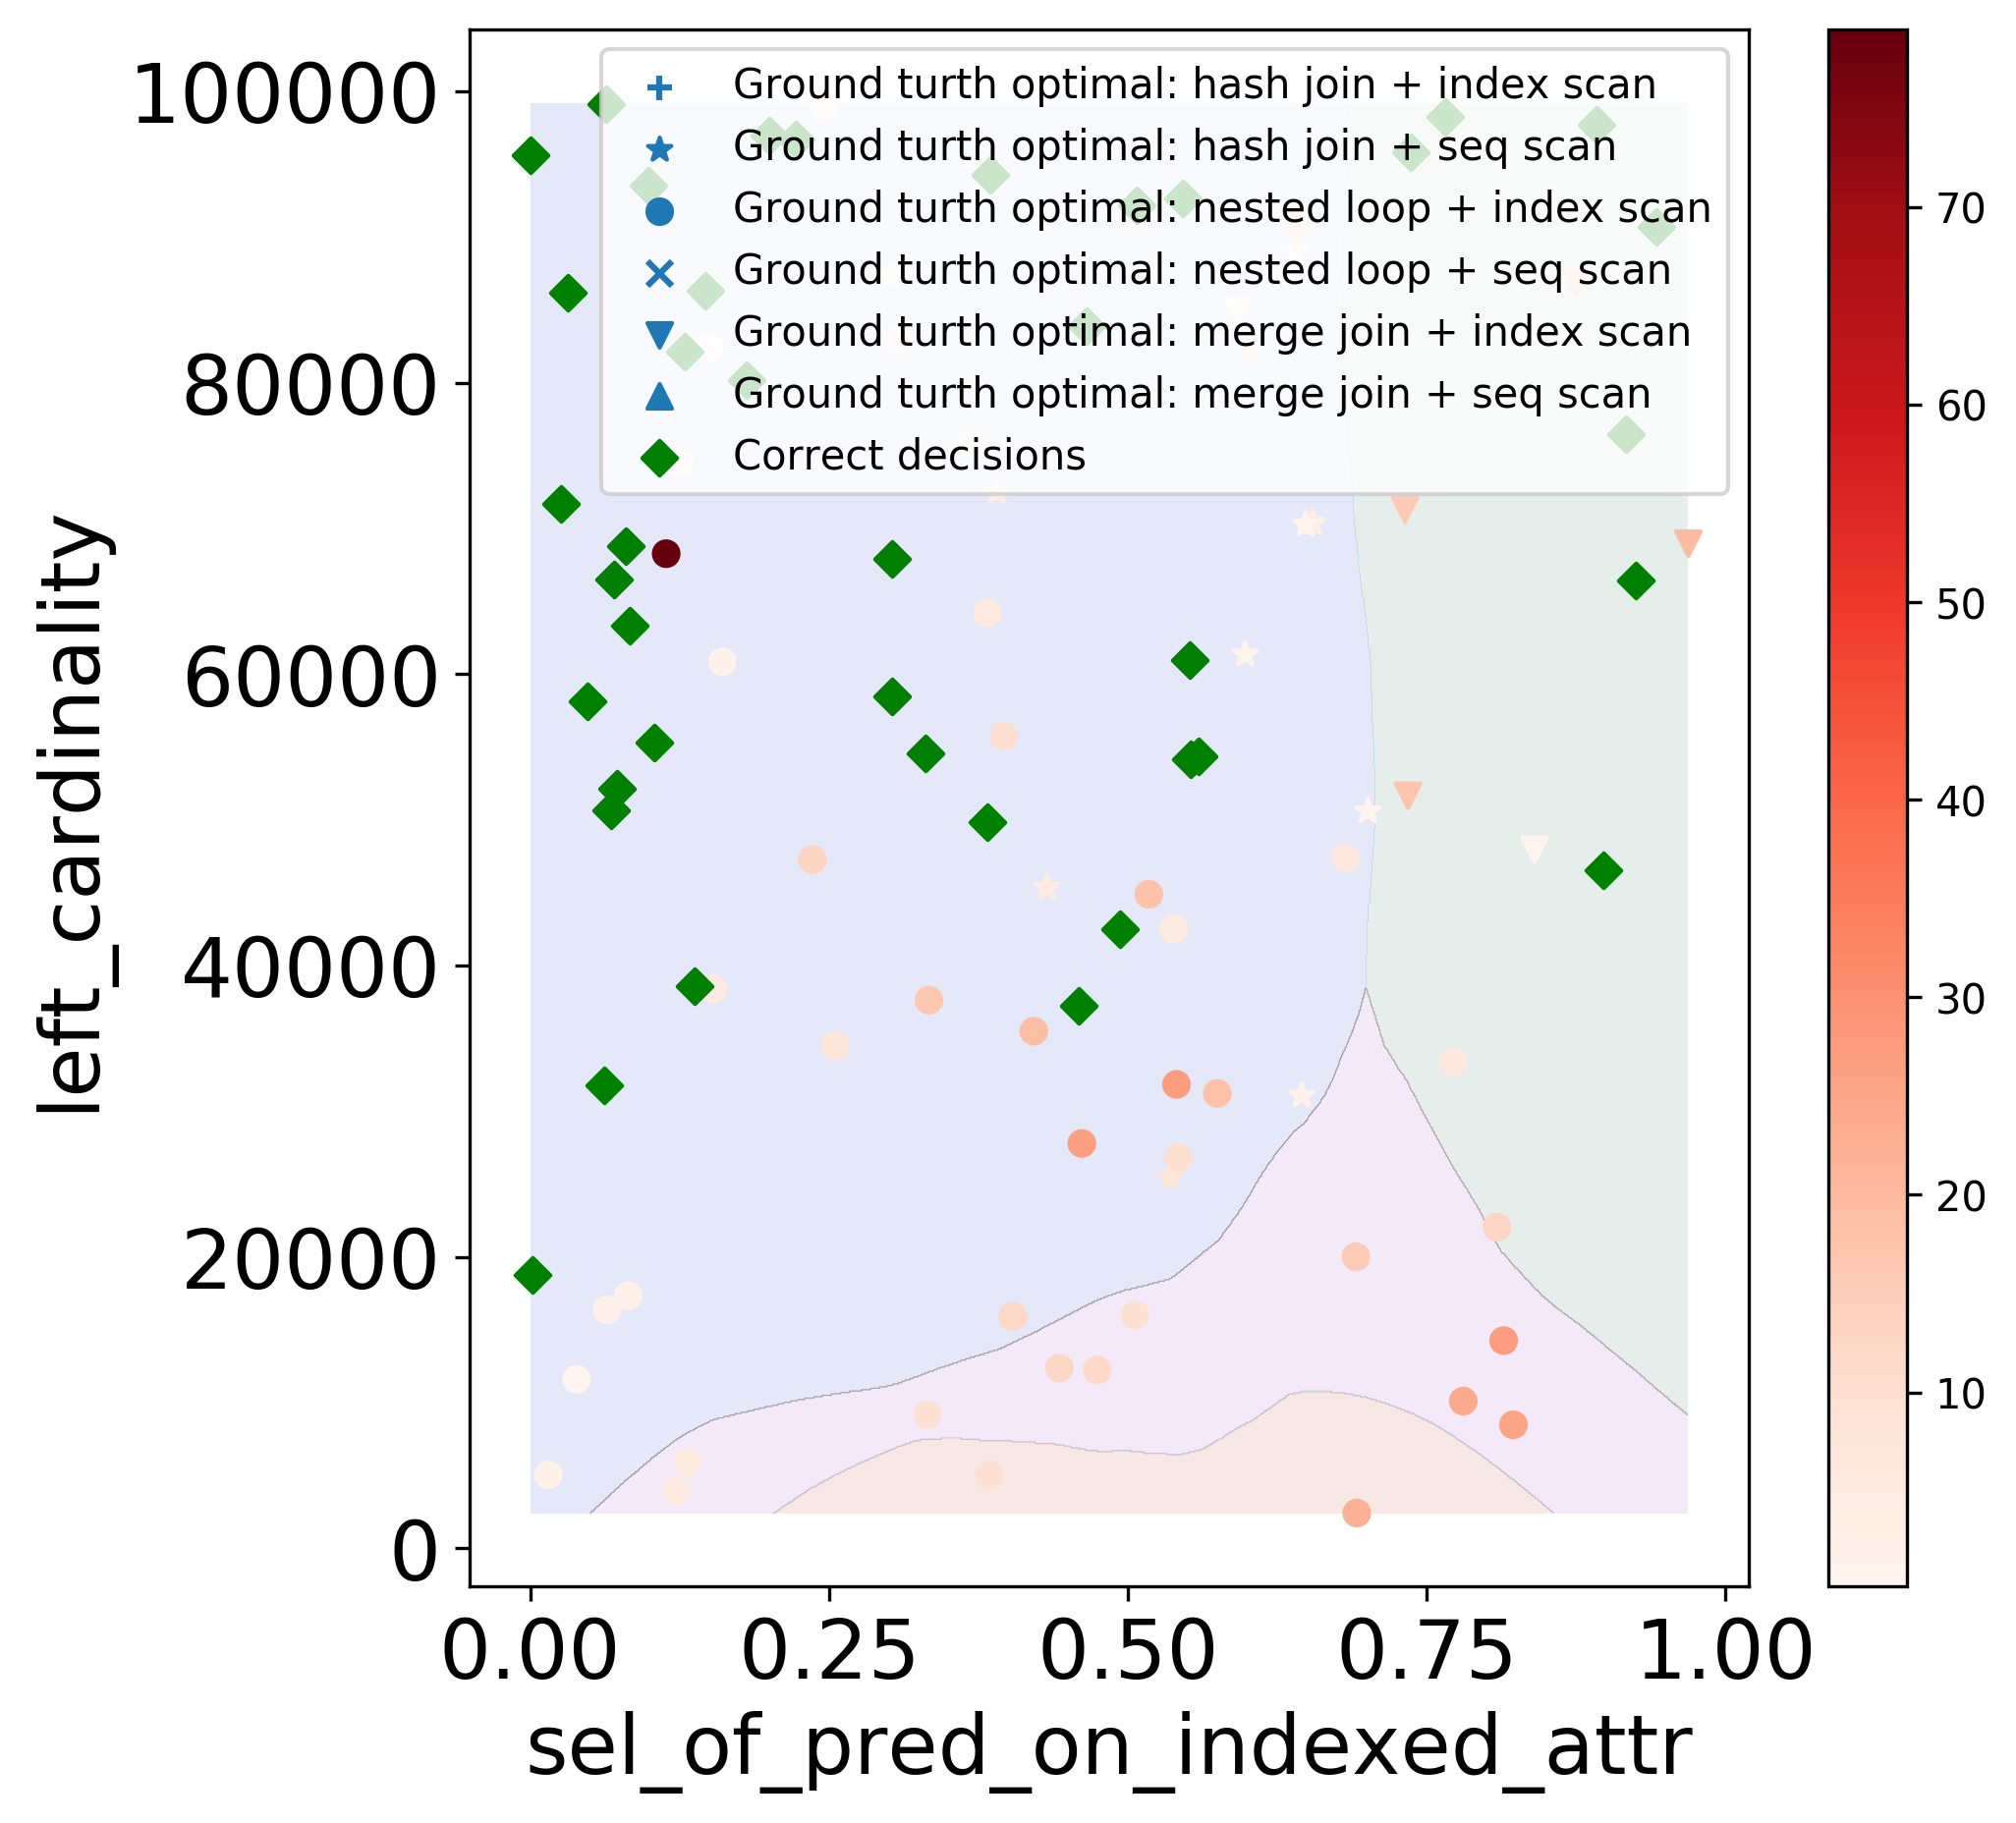

In [13]:
# present_idxs = [0, 1, 2, 3, 4, 5, 8 ,12, 21, 22, 23, 24]
present_idxs = range(len(gt_one_file_dss))
N = 100

for f_cnt in present_idxs:
    
    ds = estimated_one_file_dss[f_cnt].head(N)
    
    # ====================================================================
    X_est = ds[features]
    y_est = ds['optimal_decision']
    X_costs_est = ds[dl.regression_targets]

#     from sklearn.model_selection import train_test_split
#     from sklearn import preprocessing

#     X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)
#     X_train_costs, _, _, _, = train_test_split(X_costs, y, train_size=0.8, random_state=1)
#     X_train, X_test, y_train, y_test = \
#         X_train.to_numpy(),X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

#     X_train_weights = calculate_importance_from_costs(X_train_costs.to_numpy())

#     scaler = preprocessing.StandardScaler().fit(X_train)
#     X_train = scaler.transform(X_train)

#     # scaler = preprocessing.StandardScaler().fit(X_test)
#     X_test = scaler.transform(X_test)

#     X_train_weights = preprocessing.MinMaxScaler().fit_transform(X_train_weights.reshape(-1,1)).flatten()
    # ====================================================================
    
    
    ds = gt_one_file_dss[f_cnt].head(N)
    
    # ====================================================================
    X_gt = ds[features]
    y_gt = ds['optimal_decision']
    X_costs_gt = ds[dl.regression_targets]

#     from sklearn.model_selection import train_test_split
#     from sklearn import preprocessing

#     X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)
#     X_train_costs, _, _, _, = train_test_split(X_costs, y, train_size=0.8, random_state=1)
#     X_train, X_test, y_train, y_test = \
#         X_train.to_numpy(),X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

#     X_train_weights = calculate_importance_from_costs(X_train_costs.to_numpy())

#     scaler = preprocessing.StandardScaler().fit(X_train)
#     X_train = scaler.transform(X_train)

#     # scaler = preprocessing.StandardScaler().fit(X_test)
#     X_test = scaler.transform(X_test)

#     X_train_weights = preprocessing.MinMaxScaler().fit_transform(X_train_weights.reshape(-1,1)).flatten()
    # ====================================================================
    
    print(estimated_one_file_names[f_cnt])
    clf = models[f_cnt]
    scaler = scalers[f_cnt]
    plot_2d_problematic_area_with_decision_boundaries(clf, X_est.to_numpy(), X_costs_est.to_numpy(), X_costs_gt.to_numpy(), y_gt.to_numpy(), title=None, 
                                        x_label=features[0], y_label=features[1], scaler=scaler, 
                                        filename=None, plot_colorbar=False)
    plt.show()